# Infraestructura y tenencia

In [ ]:
pip install pandas==0.25

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas_profiling
import pandas as pd
import os
# import matplotlib
import numpy as np
# !pip install --upgrade pandas
# !pip install pandas_profiling
# import pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns
import numpy as np

import pandas

In [ ]:
inf = pd.read_csv('/content/BD Infraestructura Mun.csv')
inf = inf[inf['Clave Municipio'] != 99999]
inf = inf.drop(['Corresponsales'], axis = 1)
ten_banca = pd.read_csv('/content/BD Tenencia Banca Mun.csv')
ten_banca = ten_banca[ten_banca['Clave Municipio'] != 99999]
ten_banca['Cuentas transaccionales nivel 1-3'] = ten_banca['Cuentas transaccionales nivel 1'] + ten_banca['Cuentas transaccionales nivel 2'] + ten_banca['Cuentas transaccionales nivel 3']
ten_banca = ten_banca.drop(['Depósitos a plazo', 'ABCD', 'Cuentas transaccionales nivel 1', 'Cuentas transaccionales nivel 2', 'Cuentas transaccionales nivel 3'], axis = 1)
ten_banca = ten_banca.rename(columns = {'Hipotecario ': 'C.hipotecario',
                                        'Grupal': 'C.grupal',
                                        'Personal': 'C.personal', 
                                        'Nómina': 'C.nómina',
                                        'Automotriz': 'C.automotriz'
                                        })
ten_eacp = pd.read_csv('/content/BD Tenencia EACP Mun.csv')
ten_eacp = ten_eacp[ten_eacp['Clave Municipio'] != 99999]
ten_eacp = ten_eacp[['Clave Municipio', 'Clave \nEstado', 'Región', 'Estado', 'Municipio',
       'Población', 'Población Adulta', 'Población Adulta Mujeres',
       'Población Adulta Hombres', 'Tipo de población', 'Depósitos al ahorro', 'Crédito al consumo',
       'Crédito a la vivienda', 'trimestre']]

In [ ]:
inf.groupby(['Estado', 'Tipo de población']).agg({'Clave Municipio': pd.Series.nunique}).reset_index()

Estado Tipo de población  Clave Municipio
0     Aguascalientes     En Transición                1
1     Aguascalientes    Semi-metrópoli                1
2     Aguascalientes       Semi-urbano                5
3     Aguascalientes            Urbano                5
4    Baja California         Metrópoli                2
..               ...               ...              ...
139          Yucatán            Urbano                5
140        Zacatecas     En Transición               17
141        Zacatecas             Rural               14
142        Zacatecas       Semi-urbano               20
143        Zacatecas            Urbano                8

[144 rows x 3 columns]

In [ ]:
inf.groupby(['Región', 'Estado']).agg({'Clave Municipio': pd.Series.nunique}).reset_index()

Región               Estado  Clave Municipio
0   Centro Sur y Oriente              Hidalgo               84
1   Centro Sur y Oriente              Morelos               36
2   Centro Sur y Oriente               México              125
3   Centro Sur y Oriente               Puebla              217
4   Centro Sur y Oriente             Tlaxcala               60
5   Centro Sur y Oriente             Veracruz              212
6       Ciudad de México     Ciudad de México               16
7                Noreste             Coahuila               38
8                Noreste           Nuevo León               51
9                Noreste      San Luis Potosí               58
10               Noreste           Tamaulipas               43
11              Noroeste      Baja California                6
12              Noroeste  Baja California Sur                5
13              Noroeste            Chihuahua               67
14              Noroeste              Durango               39
15              Noroeste              Sinaloa               18
16              Noroeste               Sonora               72
17     Occidente y Bajío       Aguascalientes               11
18     Occidente y Bajío               Colima               10
19     Occidente y Bajío           Guanajuato               46
20     Occidente y Bajío              Jalisco              125
21     Occidente y Bajío            Michoacán              113
22     Occidente y Bajío              Nayarit               20
23     Occidente y Bajío            Querétaro               18
24     Occidente y Bajío            Zacatecas               58
25                   Sur             Campeche               12
26                   Sur              Chiapas              124
27                   Sur             Guerrero               81
28                   Sur               Oaxaca              570
29                   Sur         Quintana Roo               11
30                   Sur              Tabasco               17
31                   Sur              Yucatán              106

In [ ]:
financiera = inf.merge(ten_banca[['Clave Municipio','Cuentas transaccionales tradicionales', 'Cuentas de ahorro','Tarjetas de débito', 'Tarjetas de crédito', 'C.hipotecario',
                                  'C.grupal', 'C.personal', 'C.nómina', 'C.automotriz','Transacciones en TPV', 'Transacciones en cajeros automaticos','trimestre', 
                                  'Cuentas transaccionales nivel 1-3']],
                       how = 'inner', on = ['Clave Municipio', 'trimestre'])
financiera = financiera.merge(ten_eacp[['Clave Municipio','trimestre','Depósitos al ahorro','Crédito a la vivienda', 'Crédito al consumo']],
                              how = 'inner', on = ['Clave Municipio', 'trimestre'])
anio = []
mes = []
for t in financiera.trimestre:
  a = int(str(t)[:4])
  m = int(str(t)[4:])
  anio.append(a)
  mes.append(m)
financiera['anio'] = anio
financiera['mes'] = mes
financiera = financiera.drop(['trimestre'], axis = 1)
financiera['trim'] = pd.to_datetime(dict(year=financiera['anio'], month=financiera['mes'], day=1))
financiera = financiera.rename(columns = {'trim':'trimestre'})
financiera = financiera[((financiera.anio == 2021) & (financiera.mes == 6)) | ((financiera.anio == 2020) & (financiera.mes == 12)) | ((financiera.anio == 2019) & (financiera.mes == 12))]
financiera.head(2)

Clave Municipio  Clave \nEstado             Región  ...  anio mes  trimestre
7389             1001               1  Occidente y Bajío  ...  2019  12 2019-12-01
7390             1002               1  Occidente y Bajío  ...  2019  12 2019-12-01

[2 rows x 37 columns]

In [ ]:
# financiera.to_csv('inclusion_financiera_ultimo_semestre.csv')

In [ ]:
fin_2021 = financiera[financiera.anio == 2021]
# fin_2021.to_csv('inclusion_financiera_2021.csv')

In [ ]:
profile = ProfileReport(fin_2021)
profile

In [ ]:
z = {'Sucursales Banca Comercial': len(fin_2021[fin_2021['Sucursales Banca comercial']==0])/len(fin_2021),
     'Sucursales Banca de desarrollo':len(fin_2021[fin_2021['Sucursales Banca de desarrollo']==0])/len(fin_2021),
     'Sucursales Socap': len(fin_2021[fin_2021['Sucursales Socap']==0])/len(fin_2021),
     'Sucursales Sofipo': len(fin_2021[fin_2021['Sucursales Sofipo']==0])/len(fin_2021),
     'Cajeros automáticos':len(fin_2021[fin_2021['Cajeros automáticos']==0])/len(fin_2021),
     'Cuentas de ahorro': len(fin_2021[fin_2021['Cuentas de ahorro']==0])/len(fin_2021),
     'Crédito a la vivienda': len(fin_2021[fin_2021['Crédito a la vivienda']==0])/len(fin_2021)}
zeros = pd.DataFrame(z, index = ['Porcentaje de municipios'])
zeros = zeros.transpose()
zeros['Rural'] = 0
zeros['En Transición']= 0
zeros['Semi-urbano']= 0
zeros['Urbano']= 0
zeros['Semi-metrópoli']= 0
zeros['Metrópoli']= 0

In [ ]:
ssbc = fin_2021[fin_2021['Sucursales Banca comercial']==0][['Tipo de población', 'Población Adulta']].groupby(['Tipo de población']).agg({'Población Adulta':np.sum})
ssbc = ssbc/np.sum(ssbc['Población Adulta'])
ssbd = fin_2021[fin_2021['Sucursales Banca de desarrollo']==0][['Tipo de población', 'Población Adulta']].groupby(['Tipo de población']).agg({'Población Adulta':np.sum})
ssbd = ssbd/np.sum(ssbd['Población Adulta'])
sssf = fin_2021[fin_2021['Sucursales Sofipo']==0][['Tipo de población', 'Población Adulta']].groupby(['Tipo de población']).agg({'Población Adulta':np.sum})
sssf = sssf/np.sum(sssf['Población Adulta'])
sssp = fin_2021[fin_2021['Sucursales Sofipo']==0][['Tipo de población', 'Población Adulta']].groupby(['Tipo de población']).agg({'Población Adulta':np.sum})
sssp = sssp/np.sum(sssp['Población Adulta'])
sc = fin_2021[fin_2021['Cajeros automáticos']==0][['Tipo de población', 'Población Adulta']].groupby(['Tipo de población']).agg({'Población Adulta':np.sum})
sc = sc/np.sum(sc['Población Adulta'])
ca = fin_2021[fin_2021['Cuentas de ahorro']==0][['Tipo de población', 'Población Adulta']].groupby(['Tipo de población']).agg({'Población Adulta':np.sum})
ca = sc/np.sum(sc['Población Adulta'])
cv = fin_2021[fin_2021['Crédito a la vivienda']==0][['Tipo de población', 'Población Adulta']].groupby(['Tipo de población']).agg({'Población Adulta':np.sum})
cv = sc/np.sum(sc['Población Adulta'])

In [ ]:
zeros.loc['Sucursales Banca Comercial', 'En Transición'] = ssbc.loc['En Transición', 'Población Adulta']
zeros.loc['Sucursales Banca Comercial', 'Rural'] = ssbc.loc['Rural', 'Población Adulta']
zeros.loc['Sucursales Banca Comercial', 'Semi-urbano'] = ssbc.loc['Semi-urbano', 'Población Adulta']
zeros.loc['Sucursales Banca Comercial', 'Urbano'] = ssbc.loc['Urbano', 'Población Adulta']

zeros.loc['Sucursales Banca de desarrollo', 'En Transición'] = ssbd.loc['En Transición', 'Población Adulta']
zeros.loc['Sucursales Banca de desarrollo', 'Rural'] = ssbd.loc['Rural', 'Población Adulta']
zeros.loc['Sucursales Banca de desarrollo', 'Semi-urbano'] = ssbd.loc['Semi-urbano', 'Población Adulta']
zeros.loc['Sucursales Banca de desarrollo', 'Urbano'] = ssbd.loc['Urbano', 'Población Adulta']
zeros.loc['Sucursales Banca de desarrollo', 'Semi-metrópoli'] = ssbd.loc['Semi-metrópoli', 'Población Adulta']

zeros.loc['Sucursales Sofipo', 'En Transición'] = sssf.loc['En Transición', 'Población Adulta']
zeros.loc['Sucursales Sofipo', 'Rural'] = sssf.loc['Rural', 'Población Adulta']
zeros.loc['Sucursales Sofipo', 'Semi-urbano'] = sssf.loc['Semi-urbano', 'Población Adulta']
zeros.loc['Sucursales Sofipo', 'Urbano'] = sssf.loc['Urbano', 'Población Adulta']
zeros.loc['Sucursales Sofipo', 'Semi-metrópoli'] = sssf.loc['Semi-metrópoli', 'Población Adulta']

zeros.loc['Sucursales Socap', 'En Transición'] = sssp.loc['En Transición', 'Población Adulta']
zeros.loc['Sucursales Socap', 'Rural'] = sssp.loc['Rural', 'Población Adulta']
zeros.loc['Sucursales Socap', 'Semi-urbano'] = sssp.loc['Semi-urbano', 'Población Adulta']
zeros.loc['Sucursales Socap', 'Urbano'] = sssp.loc['Urbano', 'Población Adulta']
zeros.loc['Sucursales Socap', 'Semi-metrópoli'] = sssp.loc['Semi-metrópoli', 'Población Adulta']

zeros.loc['Cuentas de ahorro', 'En Transición'] = ca.loc['En Transición', 'Población Adulta']
zeros.loc['Cuentas de ahorro', 'Rural'] = ca.loc['Rural', 'Población Adulta']
zeros.loc['Cuentas de ahorro', 'Semi-urbano'] = ca.loc['Semi-urbano', 'Población Adulta']
zeros.loc['Cuentas de ahorro', 'Urbano'] = ca.loc['Urbano', 'Población Adulta']

zeros.loc['Crédito a la vivienda', 'En Transición'] = cv.loc['En Transición', 'Población Adulta']
zeros.loc['Crédito a la vivienda', 'Rural'] = cv.loc['Rural', 'Población Adulta']
zeros.loc['Crédito a la vivienda', 'Semi-urbano'] = cv.loc['Semi-urbano', 'Población Adulta']
zeros.loc['Crédito a la vivienda', 'Urbano'] = cv.loc['Urbano', 'Población Adulta']
zeros = zeros.reset_index().rename(columns = {'index': 'Canales'})
# zeros['Rural']= zeros['Rural']/zeros['Porcentaje de municipios']
# zeros['En Transición']= zeros['En Transición']/zeros['Porcentaje de municipios']
# zeros['Semi-urbano']= zeros['Semi-urbano']/zeros['Porcentaje de municipios']
# zeros['Urbano']= zeros['Urbano']/zeros['Porcentaje de municipios']
# zeros['Semi-metrópoli']= zeros['Semi-metrópoli']/zeros['Porcentaje de municipios']
zeros

Canales  ...  Metrópoli
0      Sucursales Banca Comercial  ...          0
1  Sucursales Banca de desarrollo  ...          0
2                Sucursales Socap  ...          0
3               Sucursales Sofipo  ...          0
4             Cajeros automáticos  ...          0
5               Cuentas de ahorro  ...          0
6           Crédito a la vivienda  ...          0

[7 rows x 8 columns]

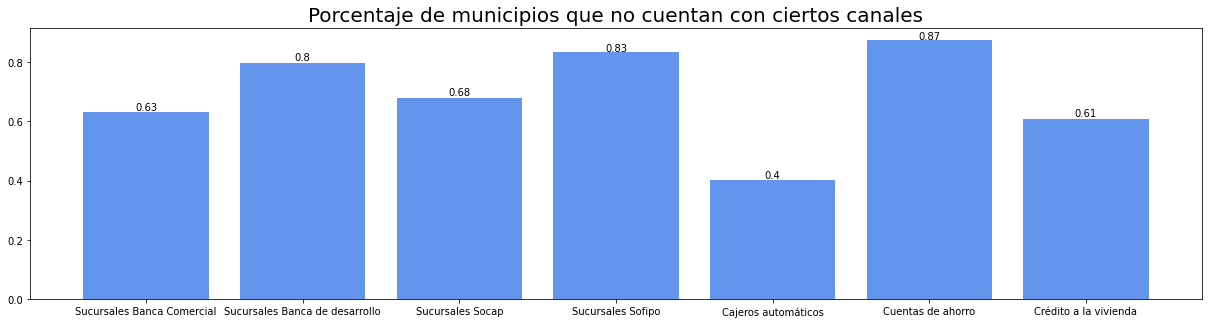

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center', va = 'bottom')
plt.figure(figsize = (21,5))
plt.bar(zeros['Canales'], zeros['Porcentaje de municipios'], color = 'cornflowerblue')
plt.title('Porcentaje de municipios que no cuentan con ciertos canales', fontsize = 20)
addlabels(zeros['Canales'], np.round(zeros['Porcentaje de municipios'],2))
plt.show()

## Porcentaje del tipo de población por región

In [ ]:
tipo_pob_region = fin_2021.groupby(['Región', 'Tipo de población']).agg({'Población Adulta': np.sum}).reset_index()
tipo_pob_region = pd.pivot_table(tipo_pob_region, values = 'Población Adulta', index = 'Región', columns= 'Tipo de población', fill_value=0).reset_index()
tipo_pob_region['Total'] = tipo_pob_region['En Transición']+tipo_pob_region['Metrópoli']+ tipo_pob_region['Rural']+tipo_pob_region['Semi-metrópoli']+tipo_pob_region['Semi-urbano'] + tipo_pob_region['Urbano']
for col in list(tipo_pob_region.columns)[1:-1]:
  tipo_pob_region[col] = tipo_pob_region[col] / tipo_pob_region['Total']
tipo_pob_region = tipo_pob_region.drop(['Total'], axis = 1)
tipo_pob_region

Tipo de población                Región  En Transición  ...  Semi-urbano    Urbano
0                  Centro Sur y Oriente       0.053090  ...     0.195507  0.359671
1                      Ciudad de México       0.000000  ...     0.000000  0.064766
2                               Noreste       0.029653  ...     0.096908  0.247220
3                              Noroeste       0.025372  ...     0.072275  0.226485
4                     Occidente y Bajío       0.038558  ...     0.158891  0.364263
5                                   Sur       0.086177  ...     0.235438  0.390743

[6 rows x 7 columns]

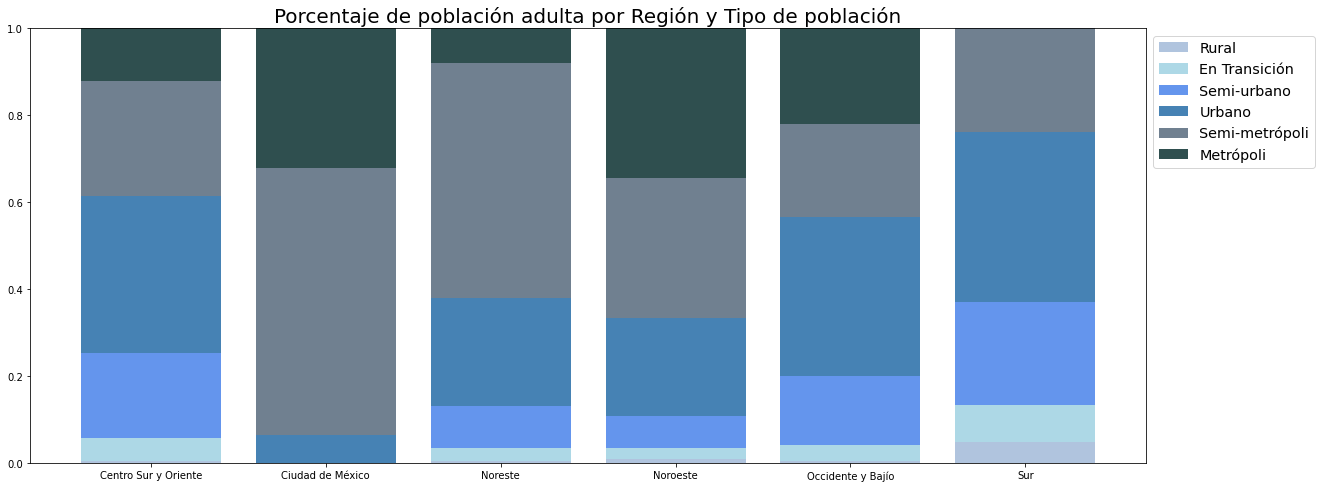

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center', va = 'bottom')
plt.figure(figsize = (20,8))
plt.bar(tipo_pob_region['Región'], tipo_pob_region['Rural'], color = 'lightsteelblue')
plt.bar(tipo_pob_region['Región'], tipo_pob_region['En Transición'], bottom=tipo_pob_region['Rural'], color='lightblue')
plt.bar(tipo_pob_region['Región'], tipo_pob_region['Semi-urbano'], bottom=tipo_pob_region['En Transición']+tipo_pob_region['Rural'], color='cornflowerblue')
plt.bar(tipo_pob_region['Región'], tipo_pob_region['Urbano'], bottom=tipo_pob_region['En Transición']+tipo_pob_region['Rural']+tipo_pob_region['Semi-urbano'], color='steelblue')
plt.bar(tipo_pob_region['Región'], tipo_pob_region['Semi-metrópoli'], bottom=tipo_pob_region['En Transición']+tipo_pob_region['Rural']+tipo_pob_region['Semi-urbano']+tipo_pob_region['Urbano'], color='slategrey')
plt.bar(tipo_pob_region['Región'], tipo_pob_region['Metrópoli'], bottom=tipo_pob_region['En Transición']+tipo_pob_region['Rural']+tipo_pob_region['Semi-urbano']+tipo_pob_region['Urbano']+tipo_pob_region['Semi-metrópoli'], color='darkslategrey')
plt.legend(['Rural','En Transición', 'Semi-urbano','Urbano','Semi-metrópoli','Metrópoli'],loc='upper left',bbox_to_anchor=(1,1), fontsize = 'x-large')
plt.title('Porcentaje de población adulta por Región y Tipo de población', fontsize = 20)
plt.show()

## Porcentaje del tipo de población en municipios por Región

In [ ]:
tipo_pob_region = fin_2021.groupby(['Región', 'Tipo de población']).agg({'Municipio': pd.Series.nunique}).reset_index()
tipo_pob_region = pd.pivot_table(tipo_pob_region, values = 'Municipio', index = 'Región', columns= 'Tipo de población', fill_value=0).reset_index()
tipo_pob_region['Total'] = tipo_pob_region['En Transición']+tipo_pob_region['Metrópoli']+ tipo_pob_region['Rural']+tipo_pob_region['Semi-metrópoli']+tipo_pob_region['Semi-urbano'] + tipo_pob_region['Urbano']
for col in list(tipo_pob_region.columns)[1:-1]:
  tipo_pob_region[col] = tipo_pob_region[col] / tipo_pob_region['Total']
tipo_pob_region = tipo_pob_region.drop(['Total'], axis = 1)
tipo_pob_region

Tipo de población                Región  En Transición  ...  Semi-urbano    Urbano
0                  Centro Sur y Oriente       0.292985  ...     0.387895  0.181568
1                      Ciudad de México       0.000000  ...     0.000000  0.187500
2                               Noreste       0.260870  ...     0.293478  0.173913
3                              Noroeste       0.229268  ...     0.209756  0.156098
4                     Occidente y Bajío       0.267677  ...     0.398990  0.217172
5                                   Sur       0.222584  ...     0.192182  0.082519

[6 rows x 7 columns]

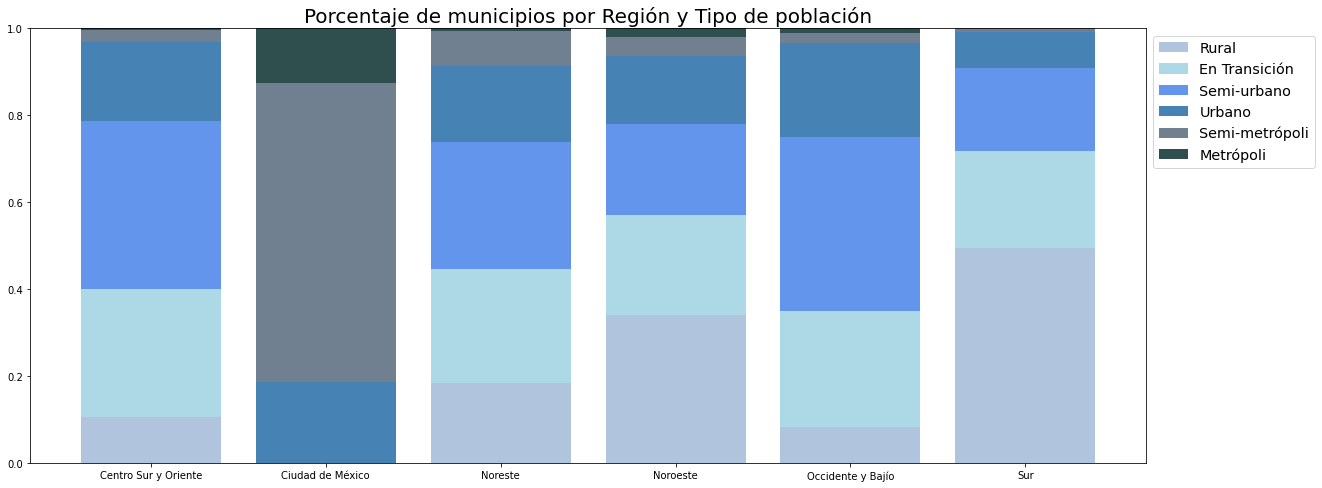

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center', va = 'bottom')
plt.figure(figsize = (20,8))
plt.bar(tipo_pob_region['Región'], tipo_pob_region['Rural'], color = 'lightsteelblue')
plt.bar(tipo_pob_region['Región'], tipo_pob_region['En Transición'], bottom=tipo_pob_region['Rural'], color='lightblue')
plt.bar(tipo_pob_region['Región'], tipo_pob_region['Semi-urbano'], bottom=tipo_pob_region['En Transición']+tipo_pob_region['Rural'], color='cornflowerblue')
plt.bar(tipo_pob_region['Región'], tipo_pob_region['Urbano'], bottom=tipo_pob_region['En Transición']+tipo_pob_region['Rural']+tipo_pob_region['Semi-urbano'], color='steelblue')
plt.bar(tipo_pob_region['Región'], tipo_pob_region['Semi-metrópoli'], bottom=tipo_pob_region['En Transición']+tipo_pob_region['Rural']+tipo_pob_region['Semi-urbano']+tipo_pob_region['Urbano'], color='slategrey')
plt.bar(tipo_pob_region['Región'], tipo_pob_region['Metrópoli'], bottom=tipo_pob_region['En Transición']+tipo_pob_region['Rural']+tipo_pob_region['Semi-urbano']+tipo_pob_region['Urbano']+tipo_pob_region['Semi-metrópoli'], color='darkslategrey')
plt.legend(['Rural','En Transición', 'Semi-urbano','Urbano','Semi-metrópoli','Metrópoli'],loc='upper left',bbox_to_anchor=(1,1), fontsize = 'x-large')
plt.title('Porcentaje de municipios por Región y Tipo de población', fontsize = 20)
plt.show()

## Municipios sin cuentas de ahorro segmentados por tipo de población

In [ ]:
fin_2021.groupby(['Tipo de población']).agg({'Clave Municipio': pd.Series.nunique}).reset_index()

Tipo de población  Clave Municipio
0     En Transición              626
1         Metrópoli               14
2             Rural              674
3    Semi-metrópoli               70
4       Semi-urbano              723
5            Urbano              362

In [ ]:
tipo_pob_ahorro = fin_2021[fin_2021['Cuentas de ahorro']==0][['Región', 'Estado', 'Tipo de población', 'Clave Municipio']]
tipo_pob_ahorro = tipo_pob_ahorro.groupby(['Tipo de población']).agg({'Clave Municipio': pd.Series.nunique}).reset_index()
tipo_pob_ahorro

Tipo de población  Clave Municipio
0     En Transición              618
1             Rural              674
2    Semi-metrópoli                5
3       Semi-urbano              678
4            Urbano              179

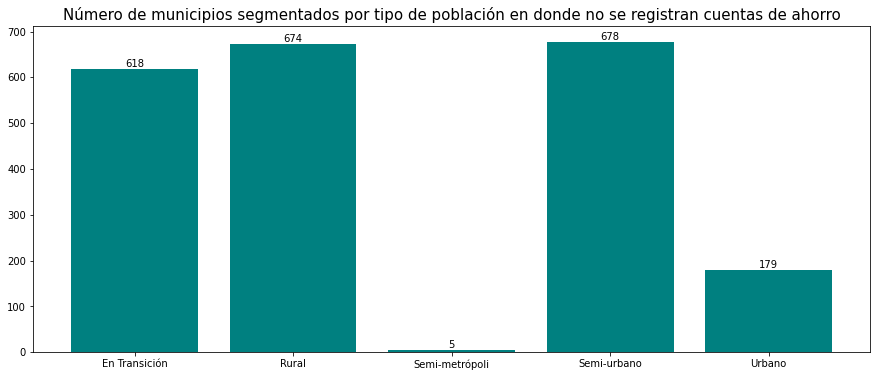

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center', va = 'bottom')
plt.figure(figsize = (15,6))
plt.bar(tipo_pob_ahorro['Tipo de población'], tipo_pob_ahorro['Clave Municipio'], color = 'teal')
addlabels(tipo_pob_ahorro['Tipo de población'],tipo_pob_ahorro['Clave Municipio'])
plt.title('Número de municipios segmentados por tipo de población en donde no se registran cuentas de ahorro',fontsize = 15)
plt.show()

## Municipios sin sucurlaes de banca comercial por Estado, Región y Tipo de Población

In [ ]:
no_banca_comercial = fin_2021[fin_2021['Sucursales Banca comercial']==0][['Región', 'Estado', 'Tipo de población', 'Clave Municipio']]
no_banca_comercial = no_banca_comercial.groupby(['Región', 'Estado', 'Tipo de población']).agg({'Clave Municipio': pd.Series.nunique}).reset_index()
no_banca_comercial

Región   Estado Tipo de población  Clave Municipio
0   Centro Sur y Oriente  Hidalgo     En Transición               20
1   Centro Sur y Oriente  Hidalgo             Rural                3
2   Centro Sur y Oriente  Hidalgo       Semi-urbano               32
3   Centro Sur y Oriente  Hidalgo            Urbano                1
4   Centro Sur y Oriente  Morelos     En Transición                9
..                   ...      ...               ...              ...
75                   Sur   Oaxaca             Rural              400
76                   Sur   Oaxaca       Semi-urbano               23
77                   Sur  Yucatán     En Transición               28
78                   Sur  Yucatán             Rural               47
79                   Sur  Yucatán       Semi-urbano                5

[80 rows x 4 columns]

Se tienen 6 regiones: ['Occidente y Bajío' 'Noroeste' 'Sur' 'Noreste' 'Ciudad de México'
 'Centro Sur y Oriente']
Las regiones sin Sucursales Banca Comercial son 5 : ['Centro Sur y Oriente' 'Noreste' 'Noroeste' 'Occidente y Bajío' 'Sur']


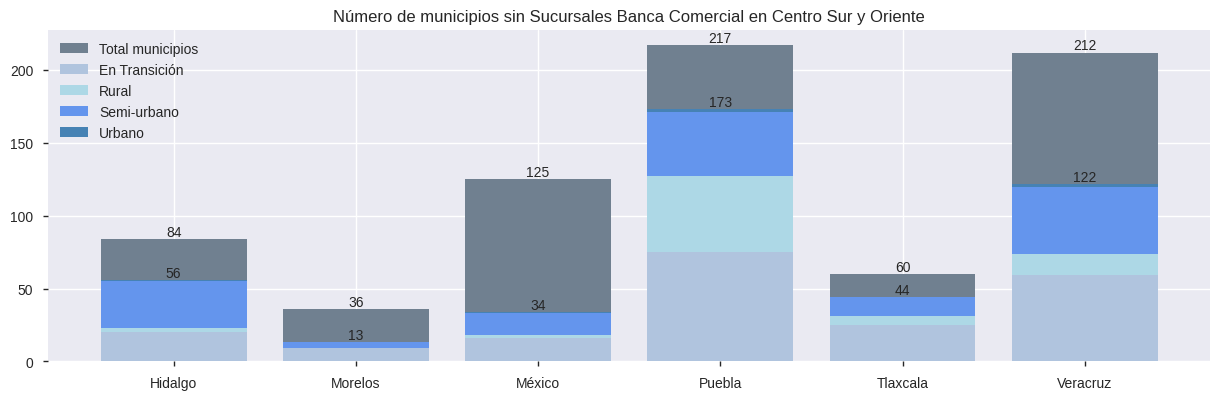

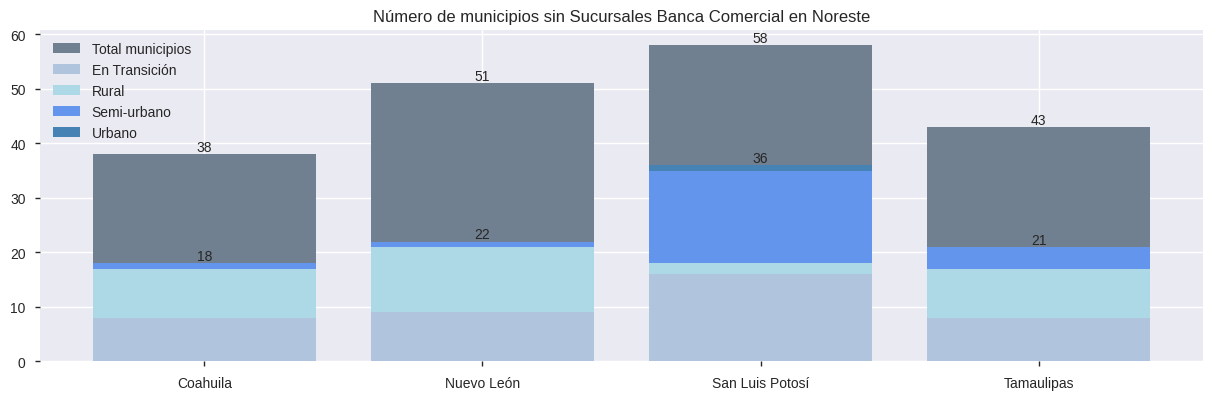

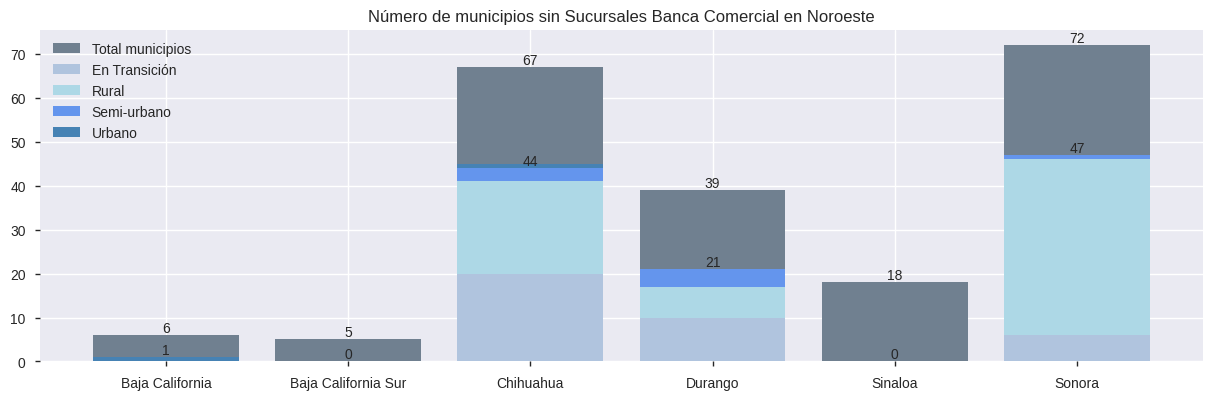

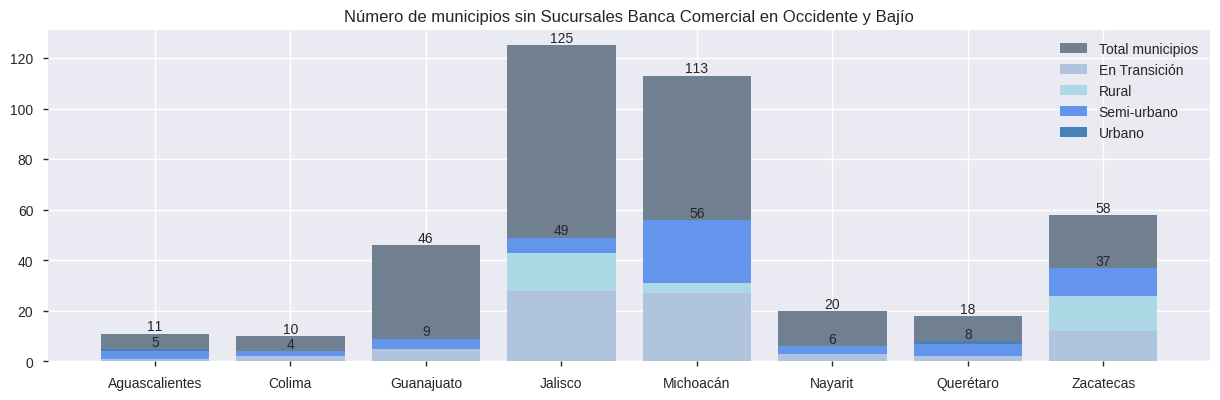

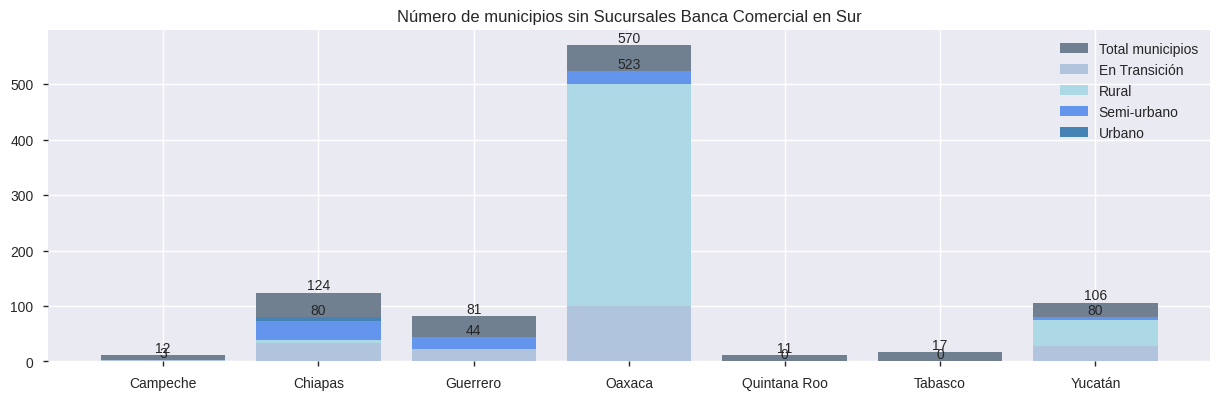

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center', va = 'bottom')
print(f'Se tienen {len(fin_2021.Región.unique())} regiones: {fin_2021.Región.unique()}')
print(f'Las regiones sin Sucursales Banca Comercial son {len(no_banca_comercial.Región.unique())} : {no_banca_comercial.Región.unique()}')
plt.figure(figsize = (15,25))
plt.subplot(len(no_banca_comercial.Región.unique()),1,1)
cso = no_banca_comercial[no_banca_comercial['Región'] == 'Centro Sur y Oriente']
cso = pd.pivot_table(cso, values = 'Clave Municipio', index = 'Estado', columns= 'Tipo de población', fill_value=0).reset_index()
n_mun = inf.groupby(['Región', 'Estado']).agg({'Clave Municipio': pd.Series.nunique}).reset_index()
n_mun = n_mun[n_mun['Región'] == 'Centro Sur y Oriente']
plt.bar(n_mun['Estado'], n_mun['Clave Municipio'], color = 'slategrey')
addlabels(list(n_mun['Estado']), list(n_mun['Clave Municipio']))
plt.bar(cso['Estado'], cso['En Transición'], color = 'lightsteelblue')
plt.bar(cso['Estado'], cso['Rural'], bottom=cso['En Transición'], color='lightblue')
plt.bar(cso['Estado'], cso['Semi-urbano'], bottom=cso['Rural']+cso['En Transición'], color='cornflowerblue')
plt.bar(cso['Estado'], cso['Urbano'], bottom=cso['Rural']+cso['En Transición']+cso['Semi-urbano'], color='steelblue')
addlabels(list(cso['Estado']), list(map(sum,zip(list(cso['En Transición']),list(cso['Rural']), list(cso['Semi-urbano']), list(cso['Urbano'])))))
plt.legend(['Total municipios','En Transición', 'Rural', 'Semi-urbano','Urbano'])
plt.title('Número de municipios sin Sucursales Banca Comercial en Centro Sur y Oriente')
plt.show()
plt.figure(figsize = (15,25))
plt.subplot(len(no_banca_comercial.Región.unique()),1,2)
nor = no_banca_comercial[no_banca_comercial['Región'] == 'Noreste']
nor = pd.pivot_table(nor, values = 'Clave Municipio', index = 'Estado', columns= 'Tipo de población', fill_value=0).reset_index()
n_mun = inf.groupby(['Región', 'Estado']).agg({'Clave Municipio': pd.Series.nunique}).reset_index()
n_mun = n_mun[n_mun['Región'] == 'Noreste']
plt.bar(n_mun['Estado'], n_mun['Clave Municipio'], color = 'slategrey')
addlabels(list(n_mun['Estado']), list(n_mun['Clave Municipio']))
plt.bar(nor['Estado'], nor['En Transición'], color = 'lightsteelblue')
plt.bar(nor['Estado'], nor['Rural'], bottom=nor['En Transición'], color='lightblue')
plt.bar(nor['Estado'], nor['Semi-urbano'], bottom=nor['Rural']+nor['En Transición'], color='cornflowerblue')
plt.bar(nor['Estado'], nor['Urbano'], bottom=nor['Rural']+nor['En Transición']+nor['Semi-urbano'], color='steelblue')
addlabels(list(nor['Estado']), list(map(sum,zip(list(nor['En Transición']),list(nor['Rural']), list(nor['Semi-urbano']), list(nor['Urbano'])))))
plt.legend(['Total municipios','En Transición', 'Rural', 'Semi-urbano','Urbano'])
plt.title('Número de municipios sin Sucursales Banca Comercial en Noreste')
plt.show()
plt.figure(figsize = (15,25))
plt.subplot(len(no_banca_comercial.Región.unique()),1,3)
noro = no_banca_comercial[no_banca_comercial['Región'] == 'Noroeste']
noro = pd.pivot_table(noro, values = 'Clave Municipio', index = 'Estado', columns= 'Tipo de población', fill_value=0).reset_index()
n_mun = inf.groupby(['Región', 'Estado']).agg({'Clave Municipio': pd.Series.nunique}).reset_index()
n_mun = n_mun[n_mun['Región'] == 'Noroeste']
plt.bar(n_mun['Estado'], n_mun['Clave Municipio'], color = 'slategrey')
addlabels(list(n_mun['Estado']), list(n_mun['Clave Municipio']))
plt.bar(noro['Estado'], noro['En Transición'], color = 'lightsteelblue')
plt.bar(noro['Estado'], noro['Rural'], bottom=noro['En Transición'], color='lightblue')
plt.bar(noro['Estado'], noro['Semi-urbano'], bottom=noro['Rural']+noro['En Transición'], color='cornflowerblue')
plt.bar(noro['Estado'], noro['Urbano'], bottom=noro['Rural']+noro['En Transición']+noro['Semi-urbano'], color='steelblue')
# muns_n = list(map(sum,zip(list(noro['En Transición']),list(noro['Rural']), list(noro['Semi-urbano']), list(noro['Urbano']))))
addlabels(list(n_mun['Estado']), [1,0,44,21,0,47])
plt.legend(['Total municipios','En Transición', 'Rural', 'Semi-urbano','Urbano'])
plt.title('Número de municipios sin Sucursales Banca Comercial en Noroeste')
plt.show()
plt.figure(figsize = (15,25))
plt.subplot(len(no_banca_comercial.Región.unique()),1,4)
ob = no_banca_comercial[no_banca_comercial['Región'] == 'Occidente y Bajío']
ob = pd.pivot_table(ob, values = 'Clave Municipio', index = 'Estado', columns= 'Tipo de población', fill_value=0).reset_index()
n_mun = inf.groupby(['Región', 'Estado']).agg({'Clave Municipio': pd.Series.nunique}).reset_index()
n_mun = n_mun[n_mun['Región'] == 'Occidente y Bajío']
plt.bar(n_mun['Estado'], n_mun['Clave Municipio'], color = 'slategrey')
addlabels(list(n_mun['Estado']), list(n_mun['Clave Municipio']))
plt.bar(ob['Estado'], ob['En Transición'], color = 'lightsteelblue')
plt.bar(ob['Estado'], ob['Rural'], bottom=ob['En Transición'], color='lightblue')
plt.bar(ob['Estado'], ob['Semi-urbano'], bottom=ob['Rural']+ob['En Transición'], color='cornflowerblue')
plt.bar(ob['Estado'], ob['Urbano'], bottom=ob['Rural']+ob['En Transición']+ob['Semi-urbano'], color='steelblue')
addlabels(list(ob['Estado']), list(map(sum,zip(list(ob['En Transición']),list(ob['Rural']), list(ob['Semi-urbano']), list(ob['Urbano'])))))
plt.legend(['Total municipios','En Transición', 'Rural', 'Semi-urbano','Urbano'])
plt.title('Número de municipios sin Sucursales Banca Comercial en Occidente y Bajío')
plt.show()
plt.figure(figsize = (15,25))
plt.subplot(len(no_banca_comercial.Región.unique()),1,5)
s = no_banca_comercial[no_banca_comercial['Región'] == 'Sur']
s = pd.pivot_table(s, values = 'Clave Municipio', index = 'Estado', columns= 'Tipo de población', fill_value=0).reset_index()
n_mun = inf.groupby(['Región', 'Estado']).agg({'Clave Municipio': pd.Series.nunique}).reset_index()
n_mun = n_mun[n_mun['Región'] == 'Sur']
plt.bar(n_mun['Estado'], n_mun['Clave Municipio'], color = 'slategrey')
addlabels(list(n_mun['Estado']), list(n_mun['Clave Municipio']))
plt.bar(s['Estado'], s['En Transición'], color = 'lightsteelblue')
plt.bar(s['Estado'], s['Rural'], bottom=s['En Transición'], color='lightblue')
plt.bar(s['Estado'], s['Semi-urbano'], bottom=s['Rural']+s['En Transición'], color='cornflowerblue')
plt.bar(s['Estado'], s['Urbano'], bottom=s['Rural']+s['En Transición']+s['Semi-urbano'], color='steelblue')
addlabels(list(n_mun['Estado']),[3, 80, 44, 523,0, 0, 80])
plt.legend(['Total municipios','En Transición', 'Rural', 'Semi-urbano','Urbano'])
plt.title('Número de municipios sin Sucursales Banca Comercial en Sur')
plt.show()

# SEC infraestructura

In [ ]:
pip install pandas==0.25

In [ ]:
import pandas_profiling
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
# !pip install --upgrade pandas
# !pip install pandas_profiling
# import pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas

In [ ]:
import pandas.plotting
from pandas.plotting import parallel_coordinates

In [ ]:
inf = pd.read_csv('/content/BD Infraestructura Mun.csv')
inf = inf[inf['Clave Municipio'] != 99999]

In [ ]:
inf.describe()

Clave Municipio  ...      trimestre
count     24650.000000  ...   24650.000000
mean      19340.199675  ...  201986.963935
std        7372.262674  ...      73.956387
min        1001.000000  ...  201903.000000
25%       14080.000000  ...  201909.000000
50%       20228.000000  ...  202006.000000
75%       24028.000000  ...  202012.000000
max       32058.000000  ...  202106.000000

[8 rows x 17 columns]

In [ ]:
# Por municipio
municipio = inf.groupby(['Clave Municipio', 'Clave \nEstado']).agg({'Población Adulta':np.mean,
                                                  'Población Adulta Mujeres': np.mean,
                                                  'Sucursales Banca comercial': np.mean, 
                                                  'Sucursales Banca de desarrollo': np.mean,
                                                  'Sucursales Socap': np.mean, 
                                                  'Sucursales Sofipo': np.mean, 
                                                  'Total\nSucursales': np.mean,
                                                  'Corresponsales': np.mean, 
                                                  'Cajeros automáticos': np.mean, 
                                                  'Terminales punto de venta': np.mean,
                                                  'Establecimientos con TPV': np.mean, 
                                                  'Contratos que utilizan banca móvil': np.mean}).reset_index()
# municipio = pd.pivot_table(municipio, index= ['Clave Municipio']) 
municipio                                                                                               

Clave Municipio  ...  Contratos que utilizan banca móvil
0                1001  ...                            348288.1
1                1002  ...                              5837.9
2                1003  ...                              9210.5
3                1004  ...                              1551.7
4                1005  ...                             20655.9
...               ...  ...                                 ...
2464            32054  ...                              1041.1
2465            32055  ...                              3951.5
2466            32056  ...                             80794.3
2467            32057  ...                              2253.6
2468            32058  ...                                65.6

[2469 rows x 14 columns]

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(municipio['Clave \nEstado'], municipio['Población Adulta'], hue = municipio['Clave Municipio'])
plt.show()

In [ ]:
mun_trim = inf.groupby(['Clave Municipio', 'trimestre']).agg({'Población Adulta':np.mean,
                                                  'Población Adulta Mujeres': np.mean,
                                                  'Sucursales Banca comercial': np.mean, 
                                                  'Sucursales Banca de desarrollo': np.mean,
                                                  'Sucursales Socap': np.mean, 
                                                  'Sucursales Sofipo': np.mean, 
                                                  'Total\nSucursales': np.mean,
                                                  'Corresponsales': np.mean, 
                                                  'Cajeros automáticos': np.mean, 
                                                  'Terminales punto de venta': np.mean,
                                                  'Establecimientos con TPV': np.mean, 
                                                  'Contratos que utilizan banca móvil': np.mean
                                           }).reset_index()
mun_trim

Clave Municipio  ...  Contratos que utilizan banca móvil
0                 1001  ...                              241956
1                 1001  ...                              277216
2                 1001  ...                              301881
3                 1001  ...                              325932
4                 1001  ...                              343777
...                ...  ...                                 ...
24645            32058  ...                                  74
24646            32058  ...                                  77
24647            32058  ...                                  77
24648            32058  ...                                  94
24649            32058  ...                                  99

[24650 rows x 14 columns]

In [ ]:
edo_trim = inf.groupby(['Clave \nEstado', 'trimestre']).agg({'Población Adulta':np.mean,
                                                  'Población Adulta Mujeres': np.mean,
                                                  'Población Adulta Hombres':np.mean,
                                                  'Sucursales Banca comercial': np.mean, 
                                                  'Sucursales Banca de desarrollo': np.mean,
                                                  'Sucursales Socap': np.mean, 
                                                  'Sucursales Sofipo': np.mean, 
                                                  'Total\nSucursales': np.mean,
                                                  'Corresponsales': np.mean, 
                                                  'Cajeros automáticos': np.mean, 
                                                  'Terminales punto de venta': np.mean,
                                                  'Establecimientos con TPV': np.mean, 
                                                  'Contratos que utilizan banca móvil': np.mean
                                           }).reset_index()
edo_trim

Clave \nEstado  ...  Contratos que utilizan banca móvil
0                 1  ...                        25367.818182
1                 1  ...                        29494.636364
2                 1  ...                        32269.363636
3                 1  ...                        35159.818182
4                 1  ...                        37278.909091
..              ...  ...                                 ...
315              32  ...                         6241.448276
316              32  ...                         6486.327586
317              32  ...                         6955.793103
318              32  ...                         7353.155172
319              32  ...                         7872.620690

[320 rows x 15 columns]

In [ ]:
cols = list(mun_trim.columns)[2:]
cols

['Población Adulta',
 'Población Adulta Mujeres',
 'Sucursales Banca comercial',
 'Sucursales Banca de desarrollo',
 'Sucursales Socap',
 'Sucursales Sofipo',
 'Total\nSucursales',
 'Corresponsales',
 'Cajeros automáticos',
 'Terminales punto de venta',
 'Establecimientos con TPV',
 'Contratos que utilizan banca móvil']

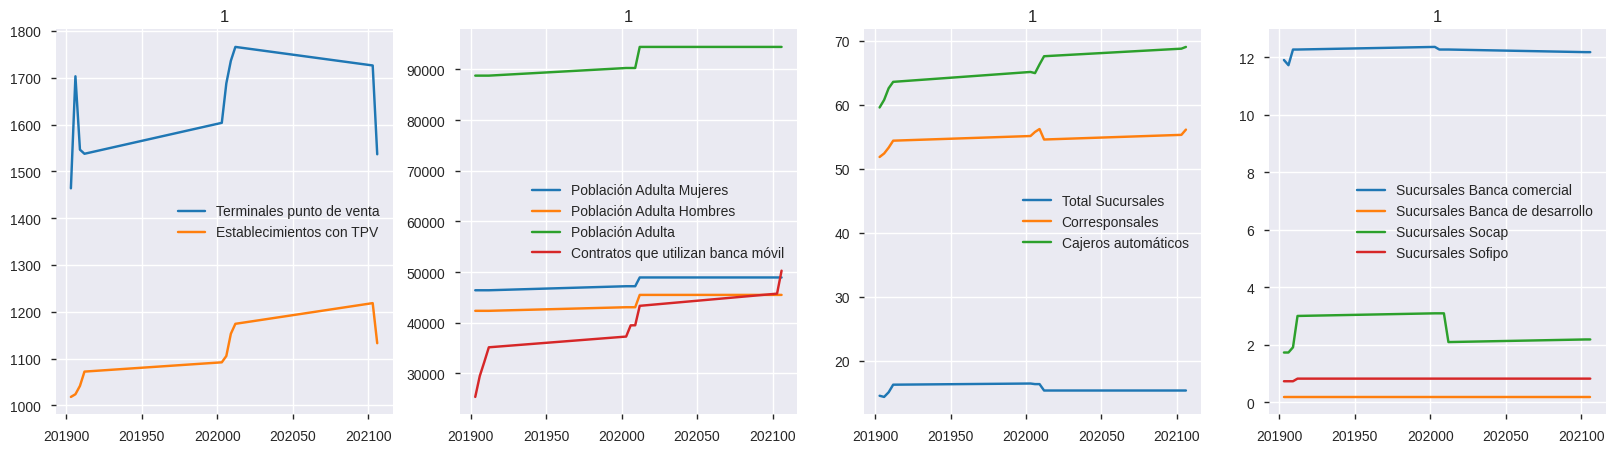

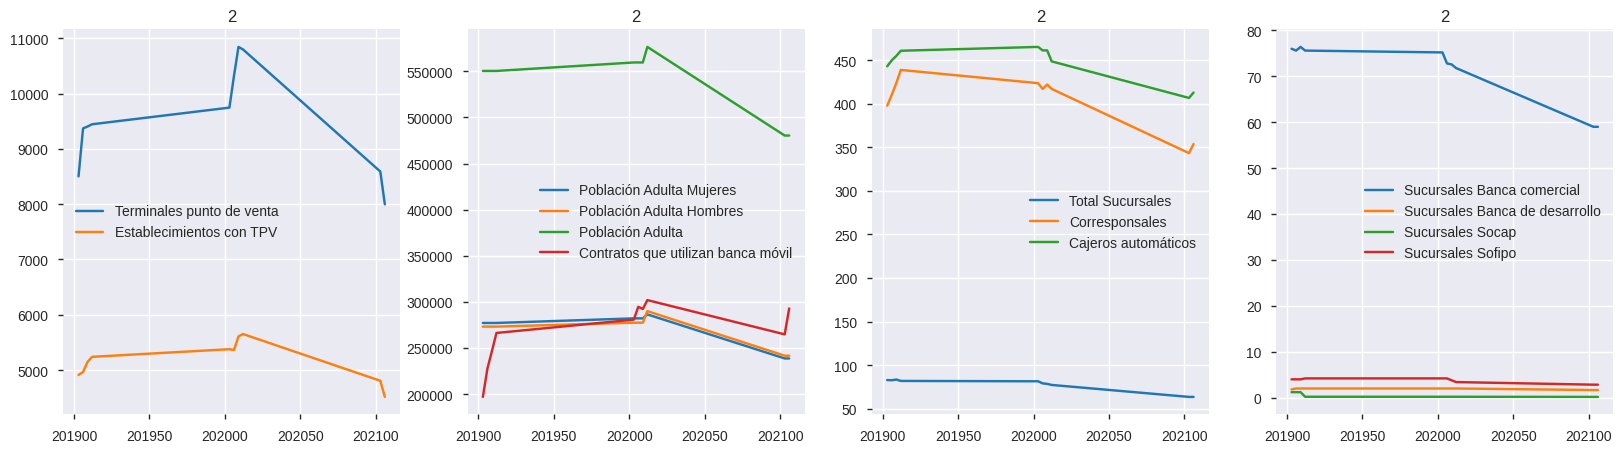

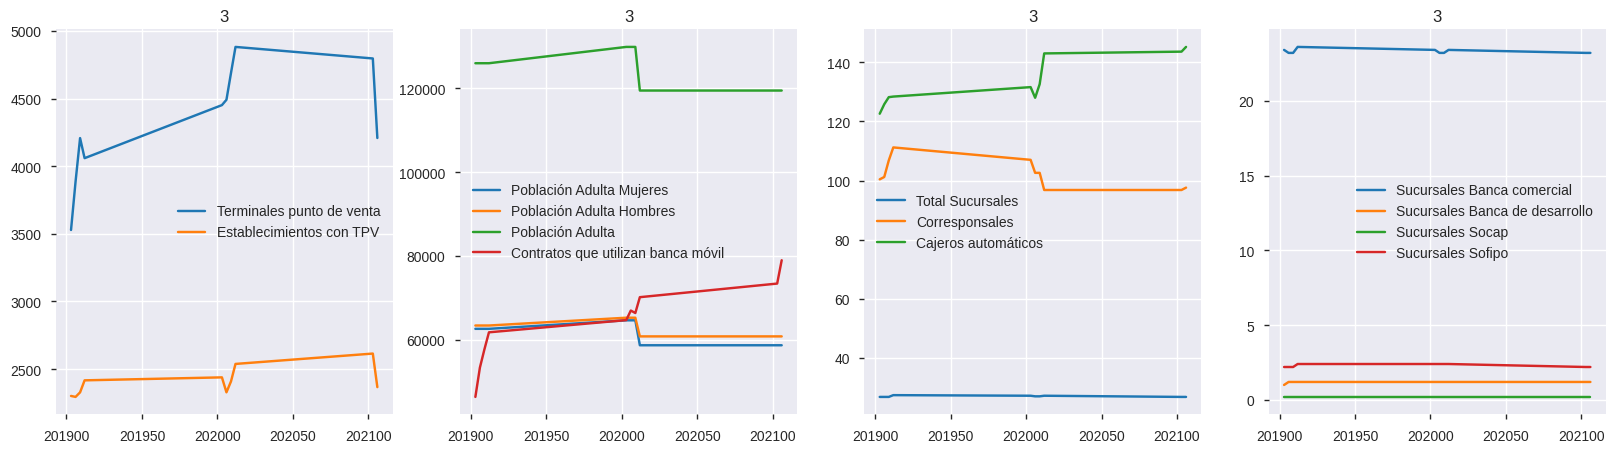

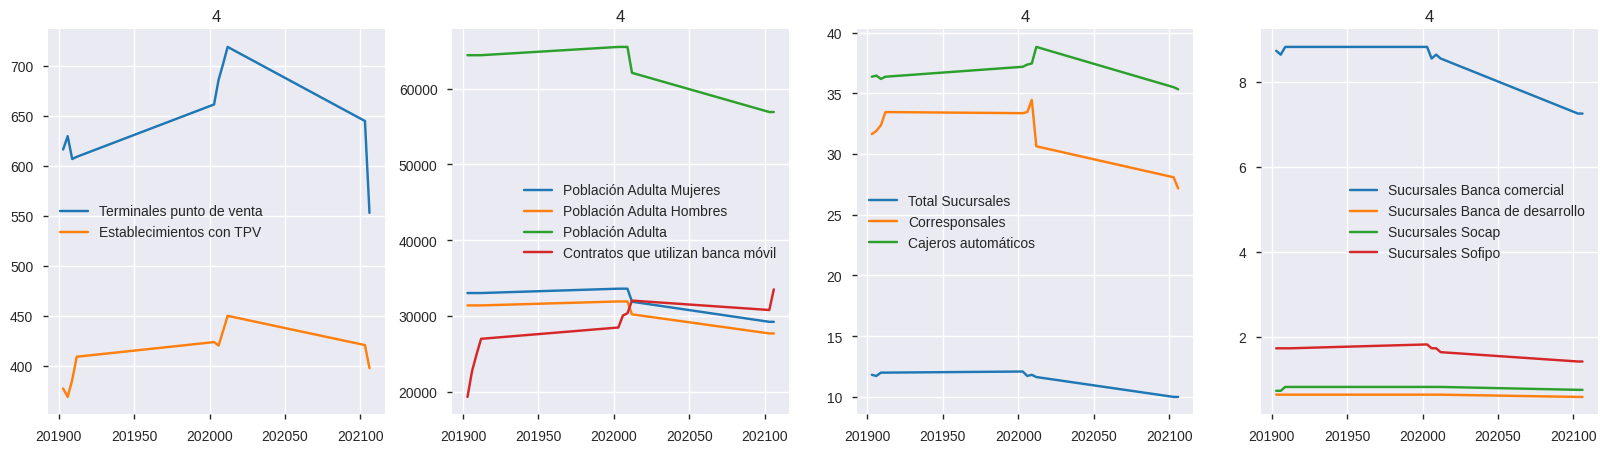

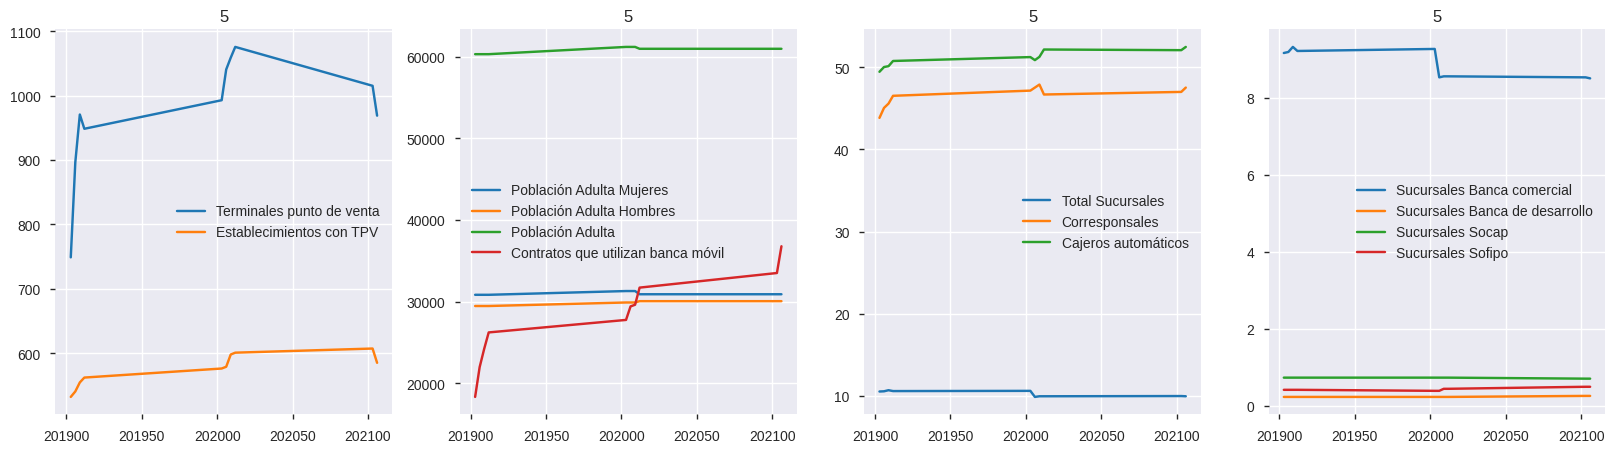

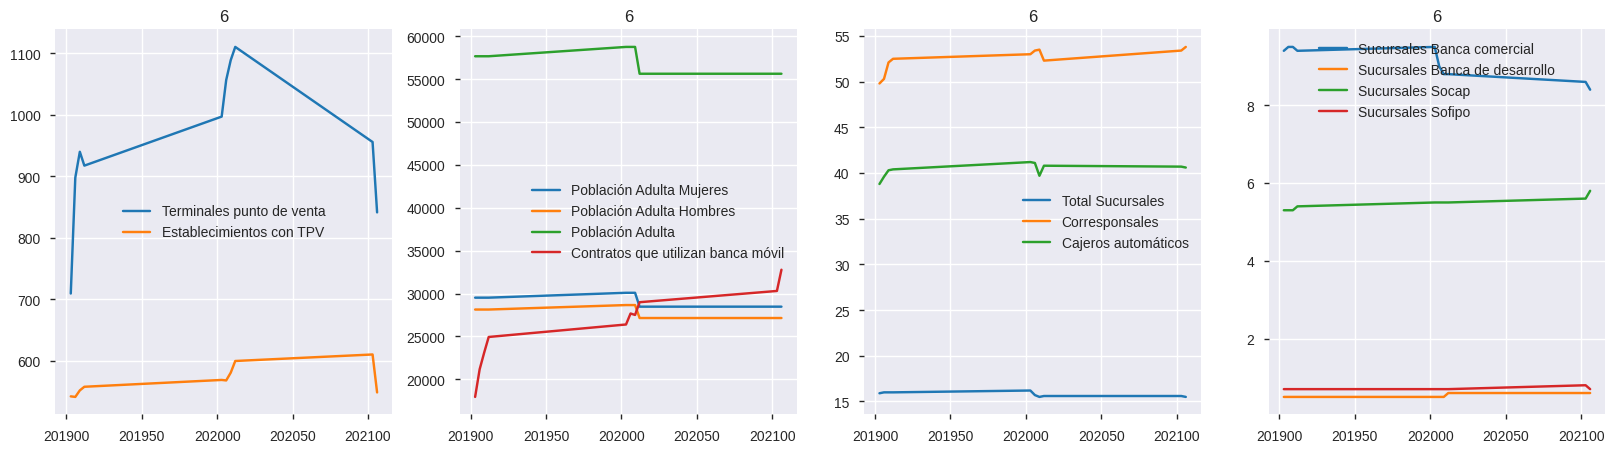

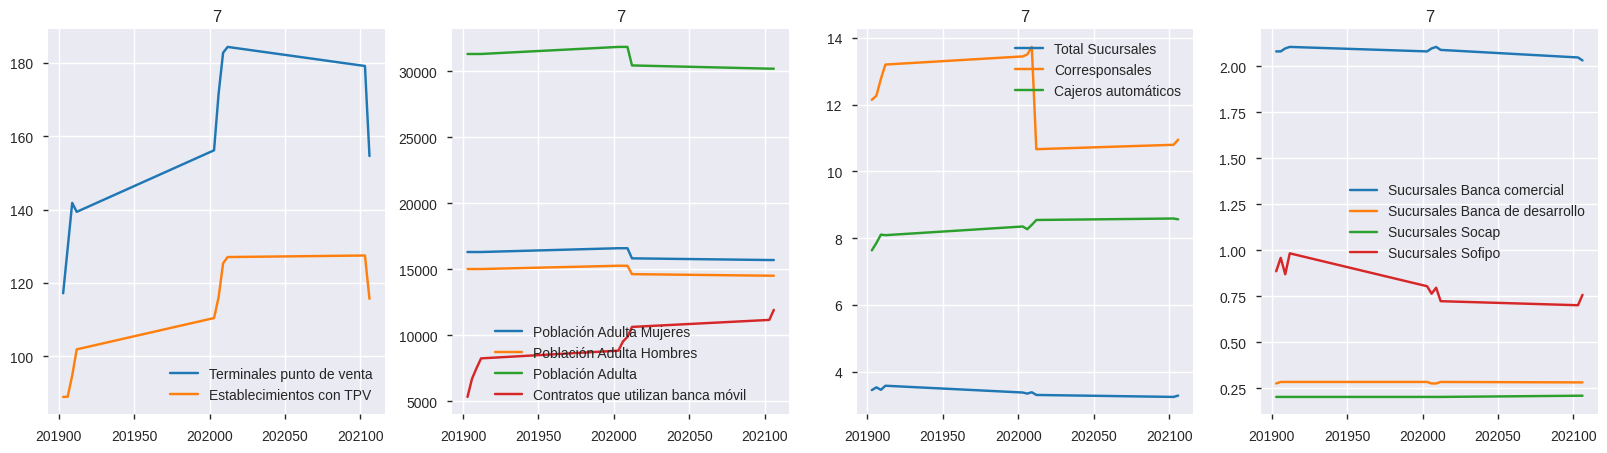

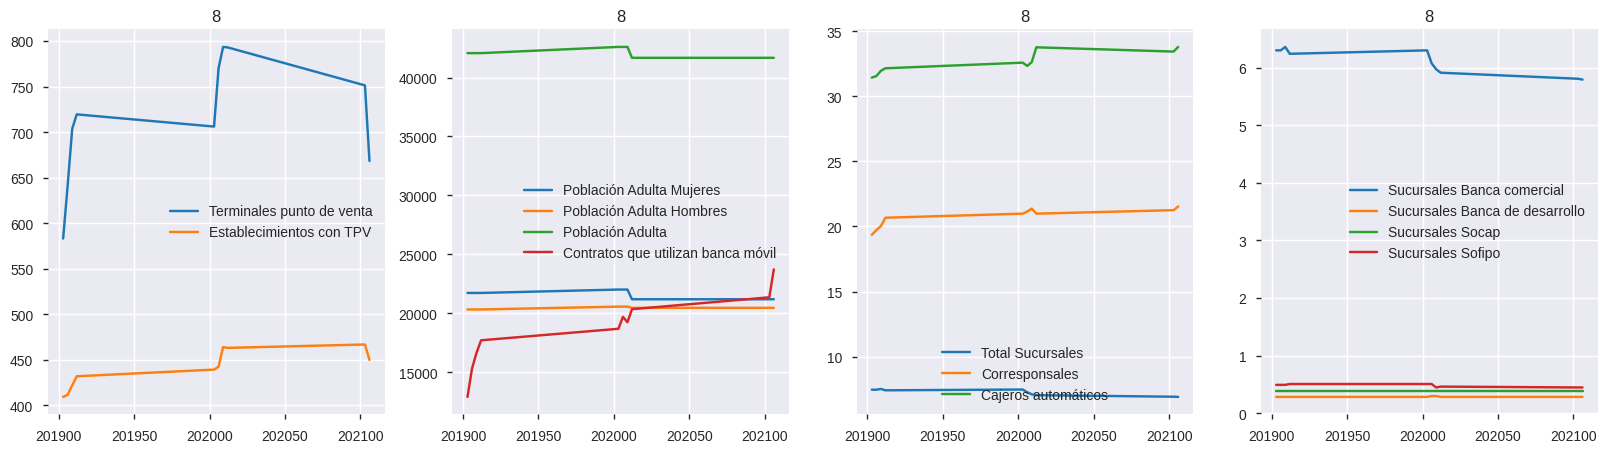

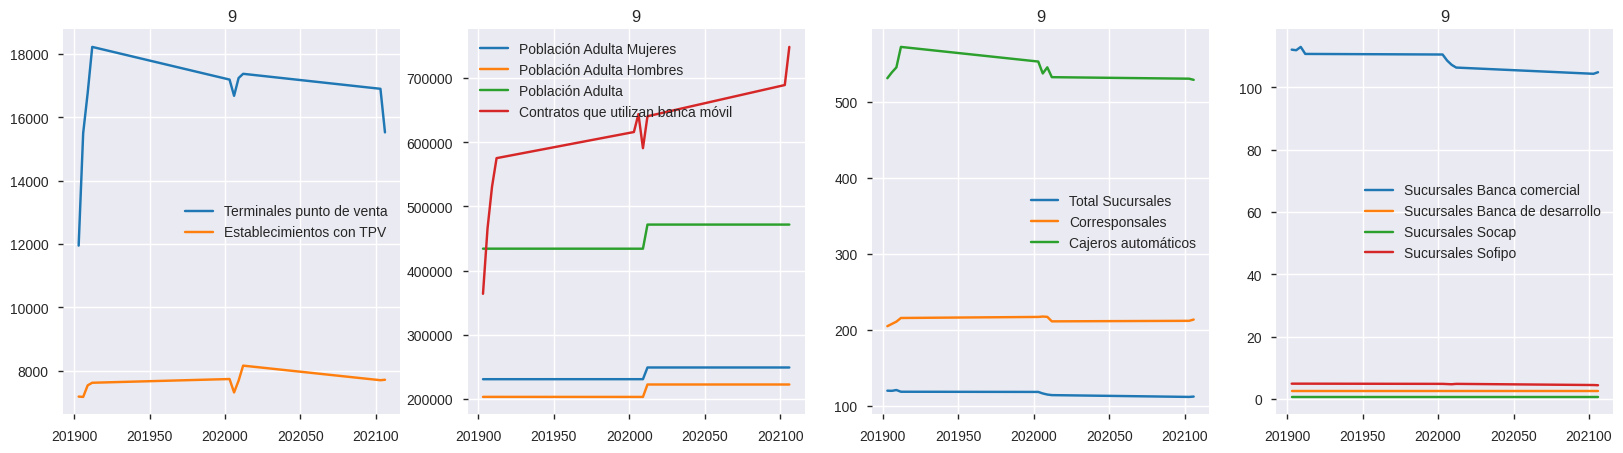

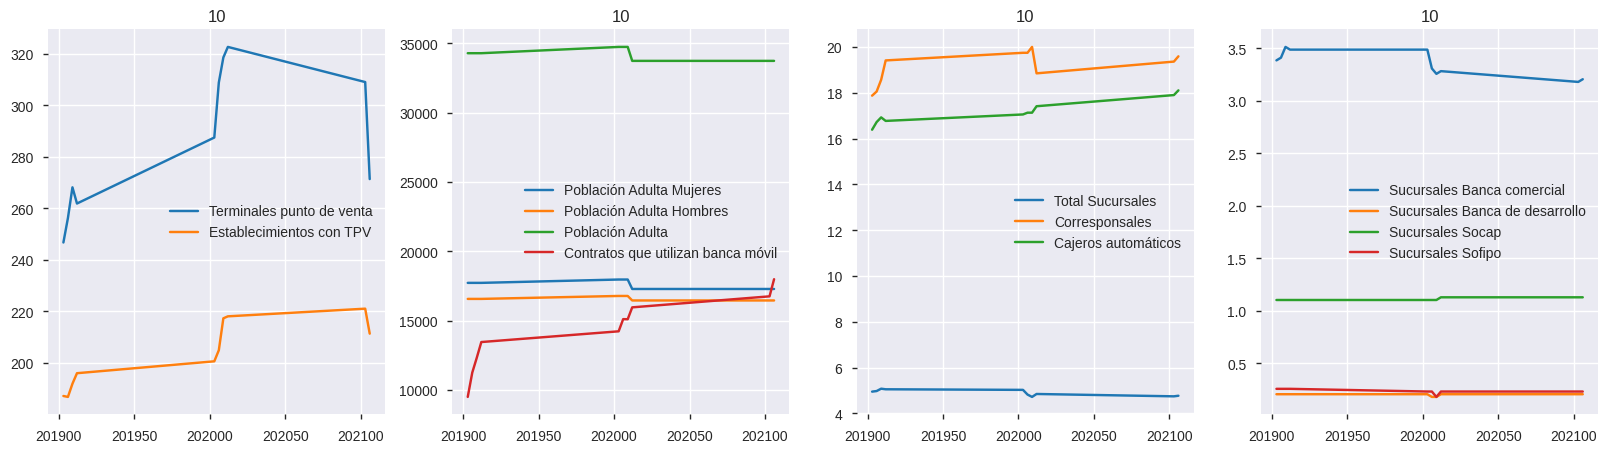

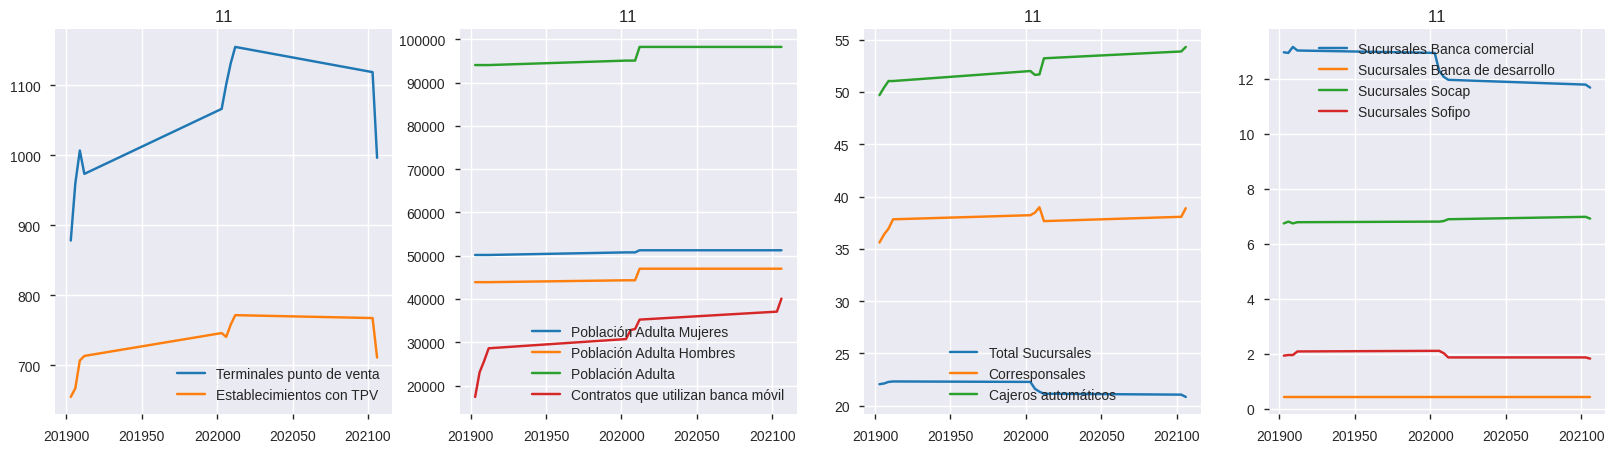

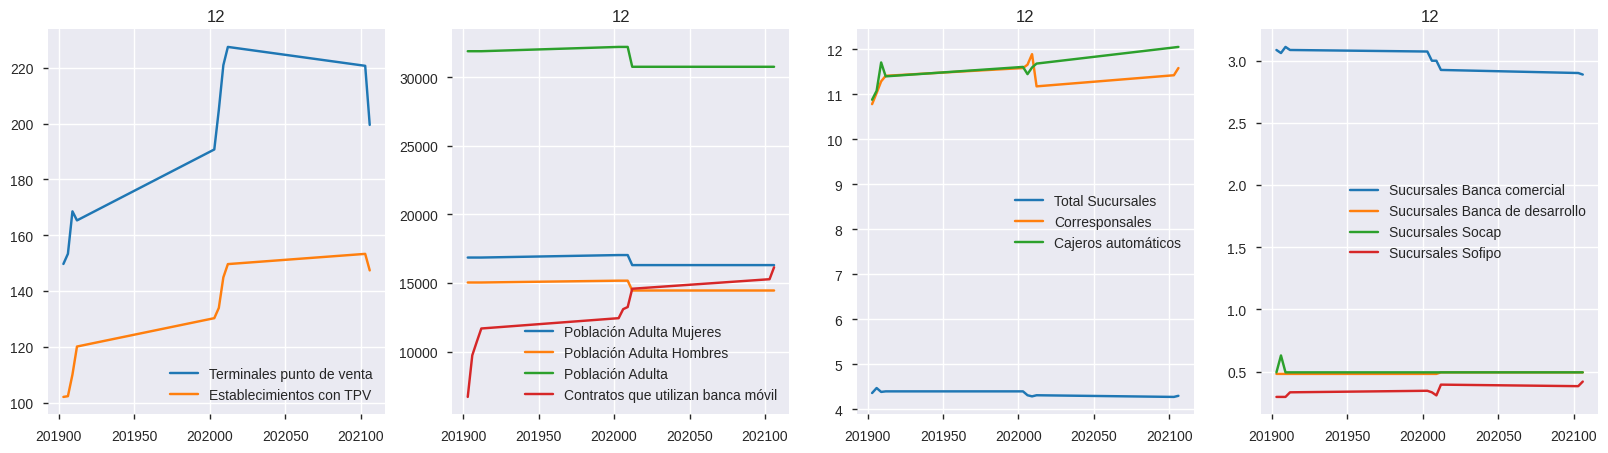

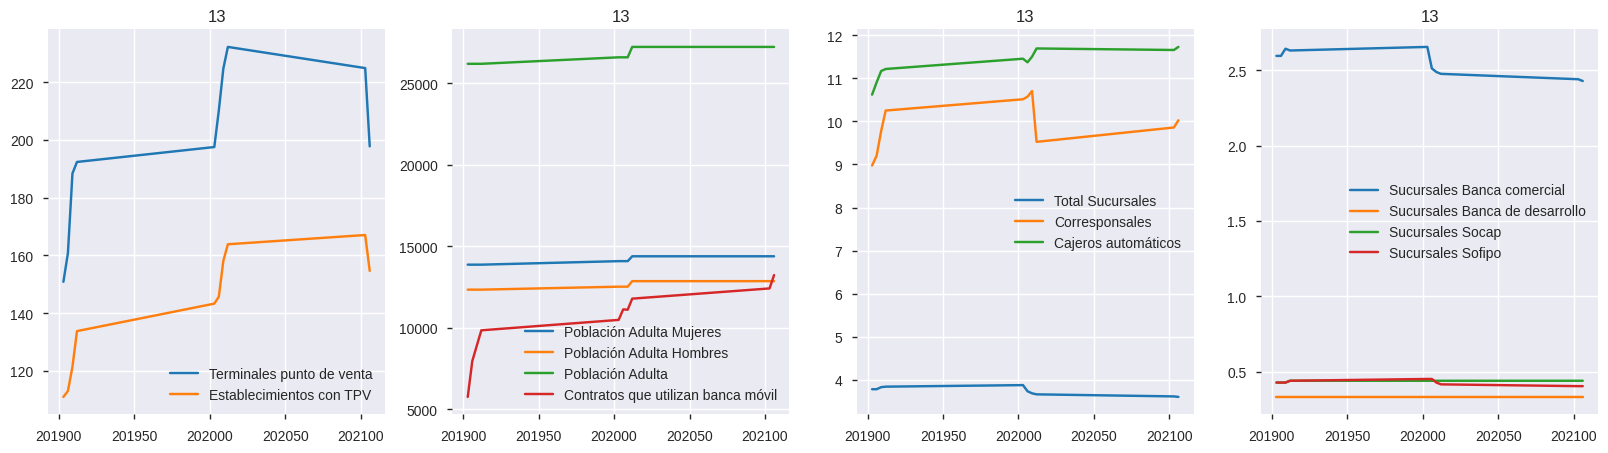

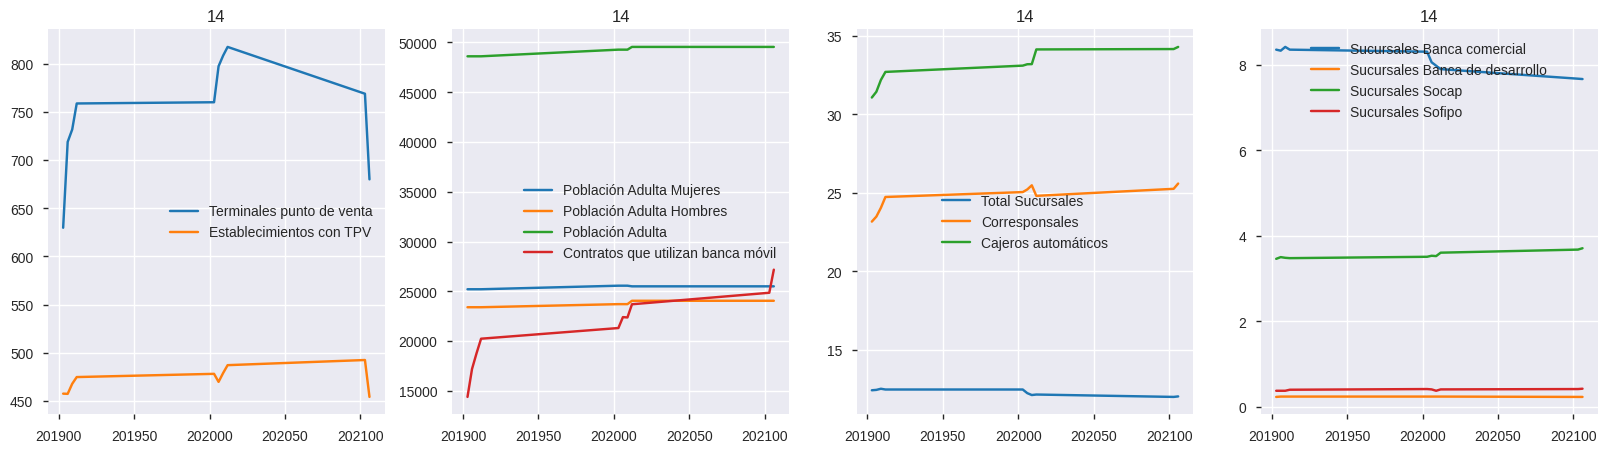

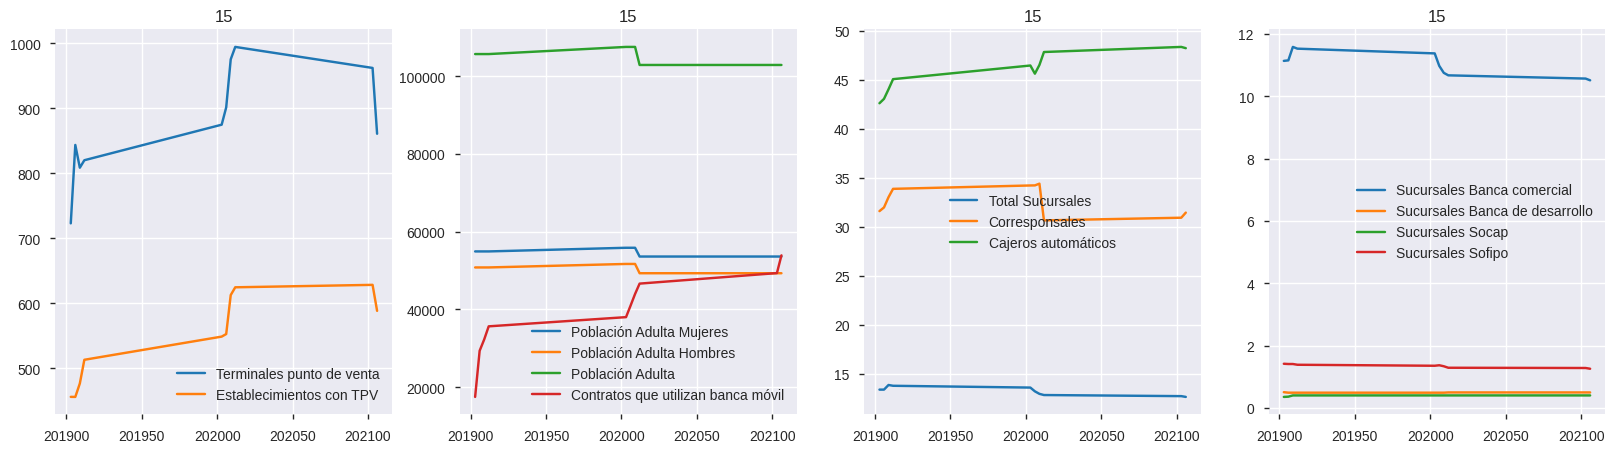

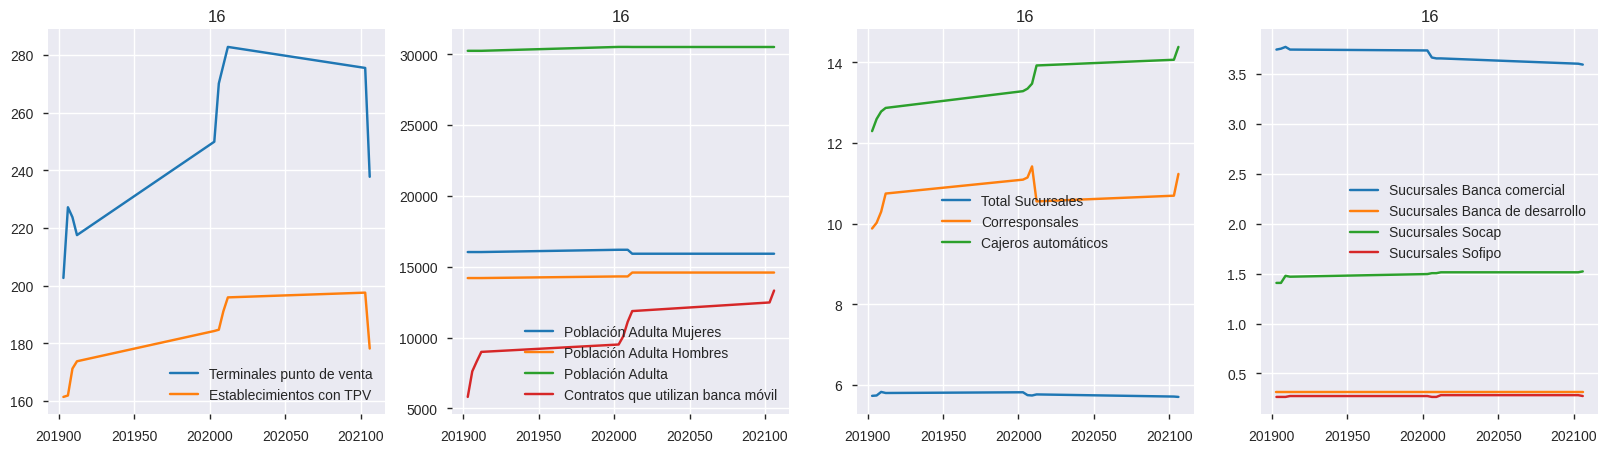

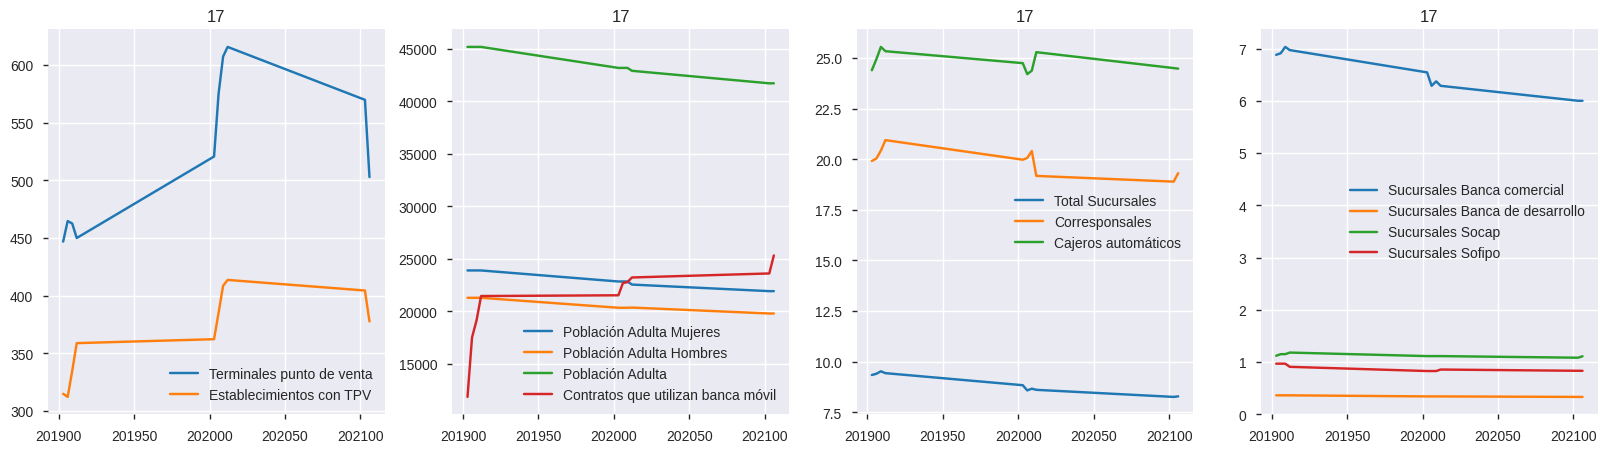

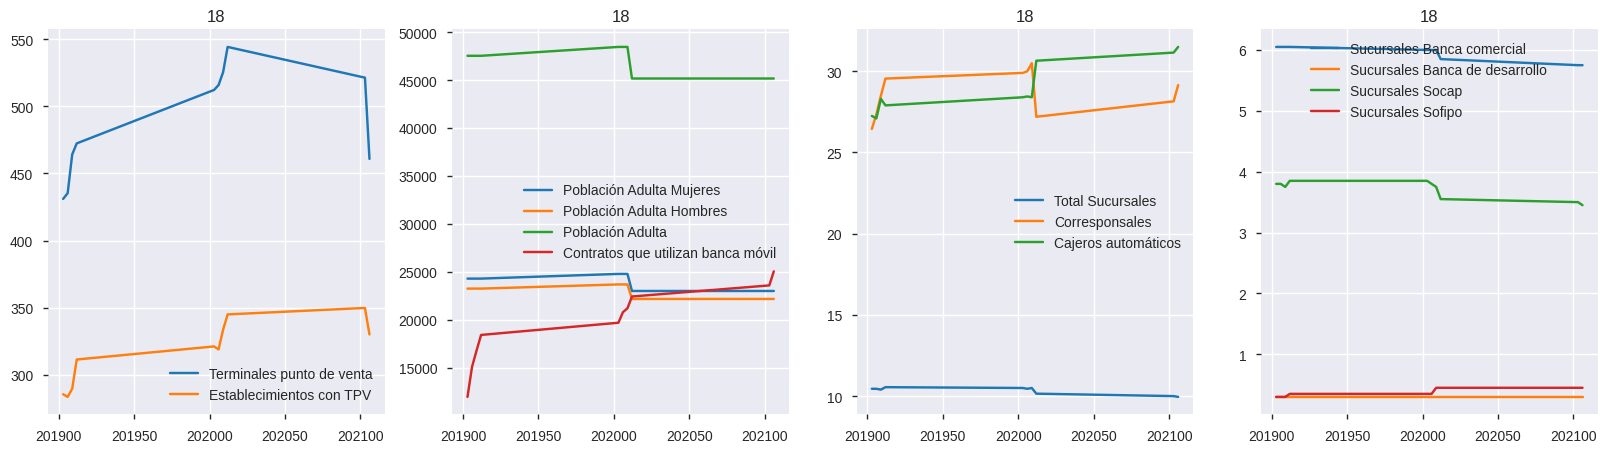

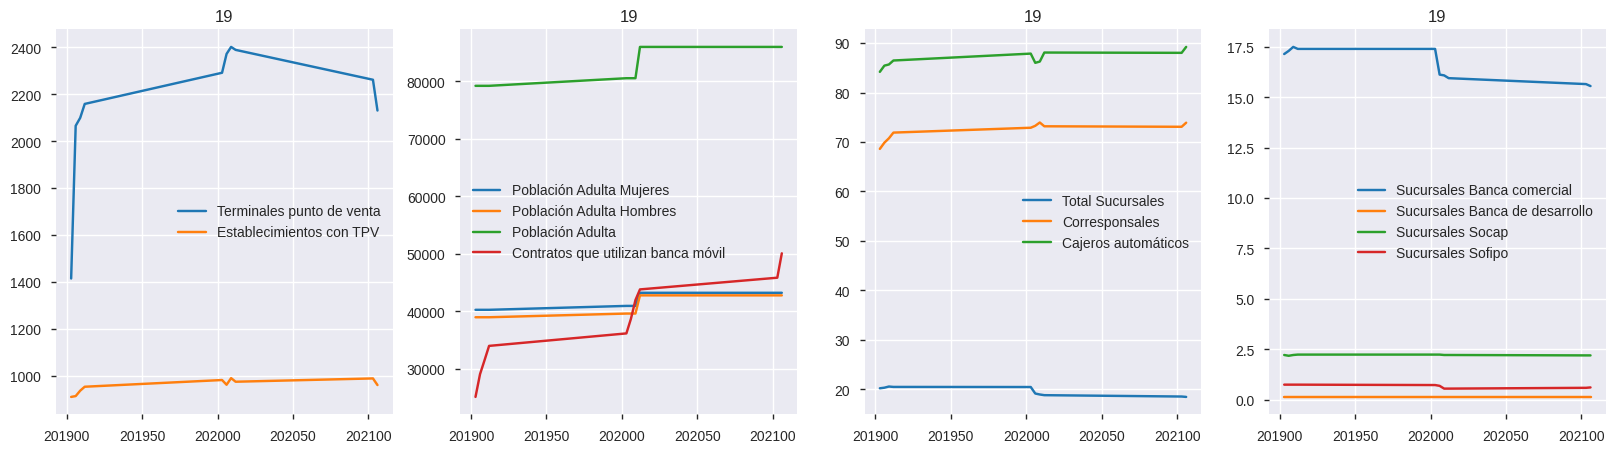

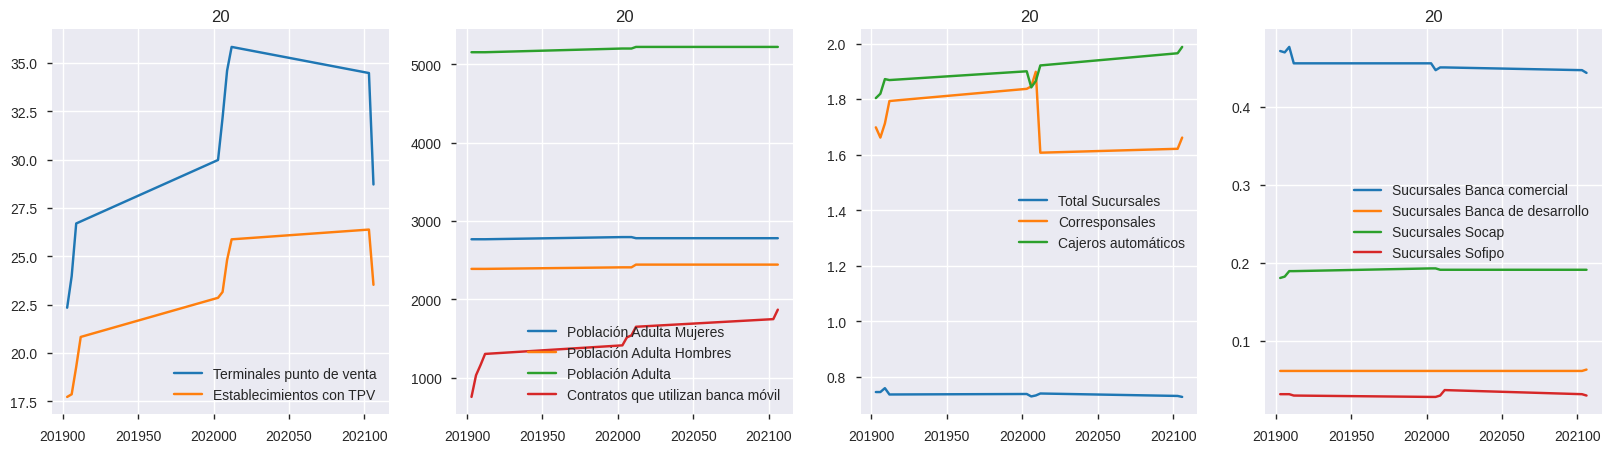

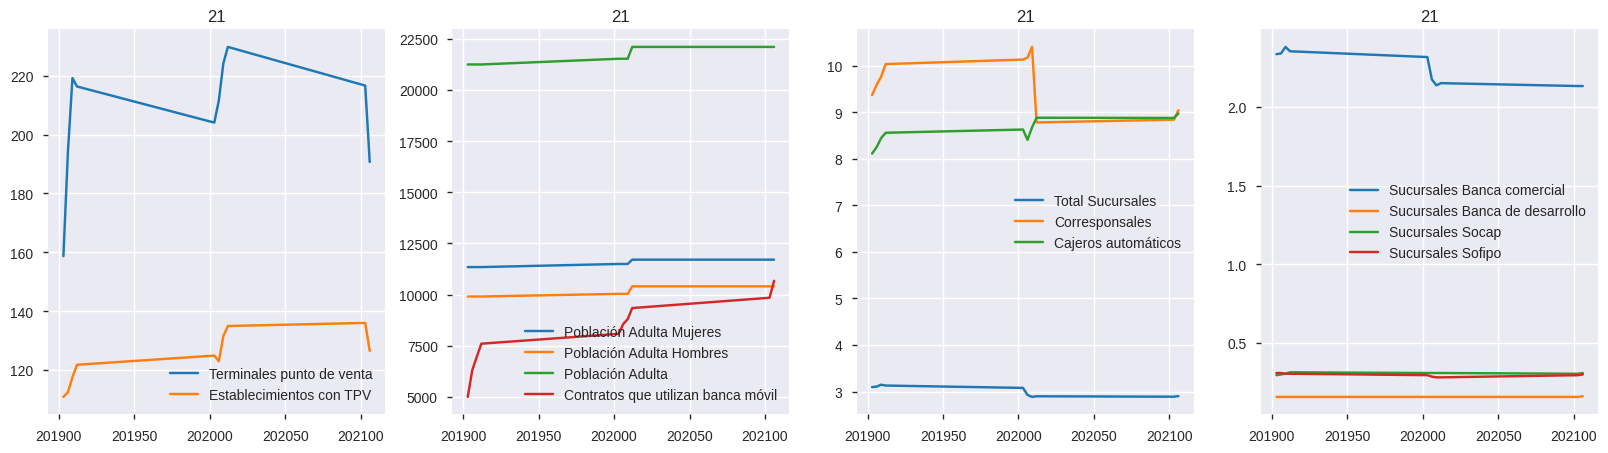

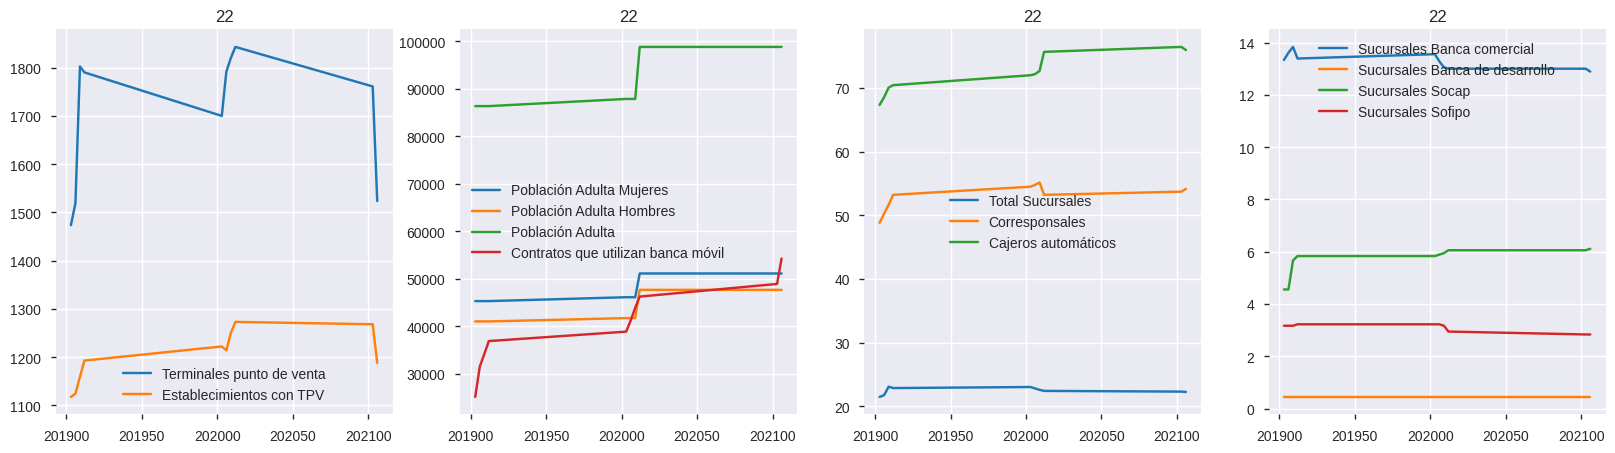

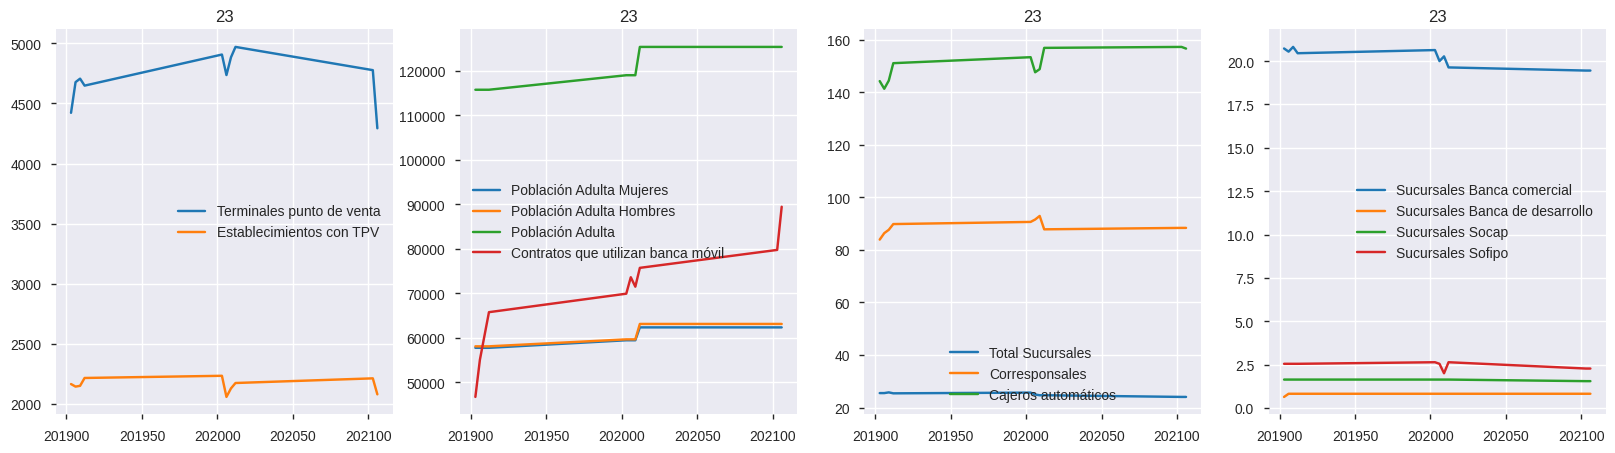

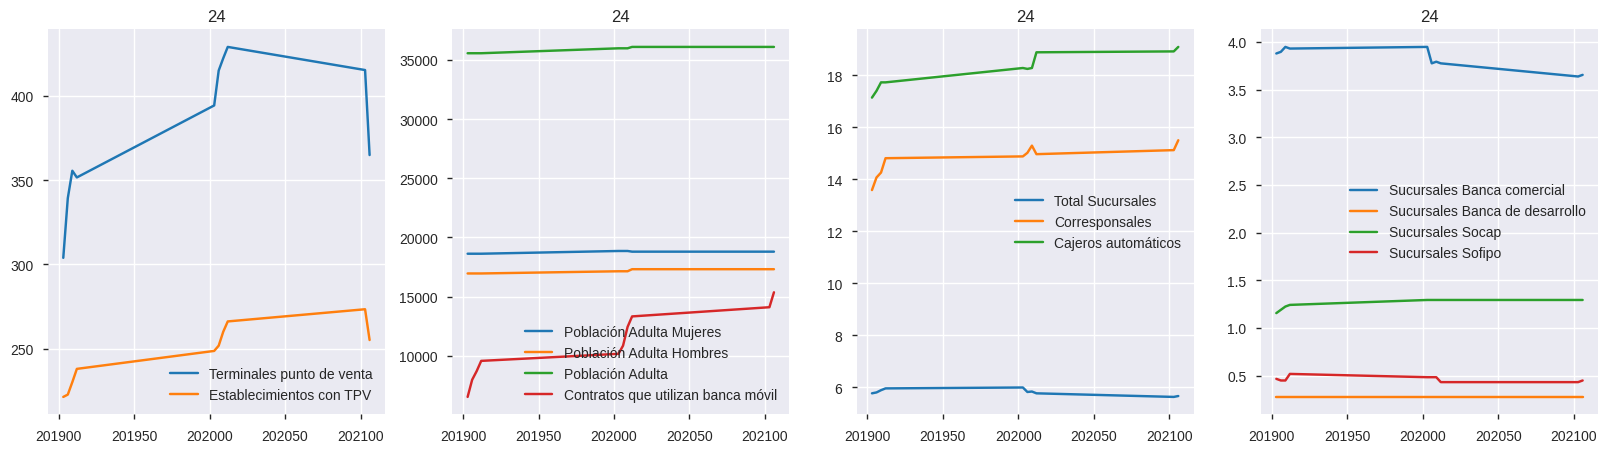

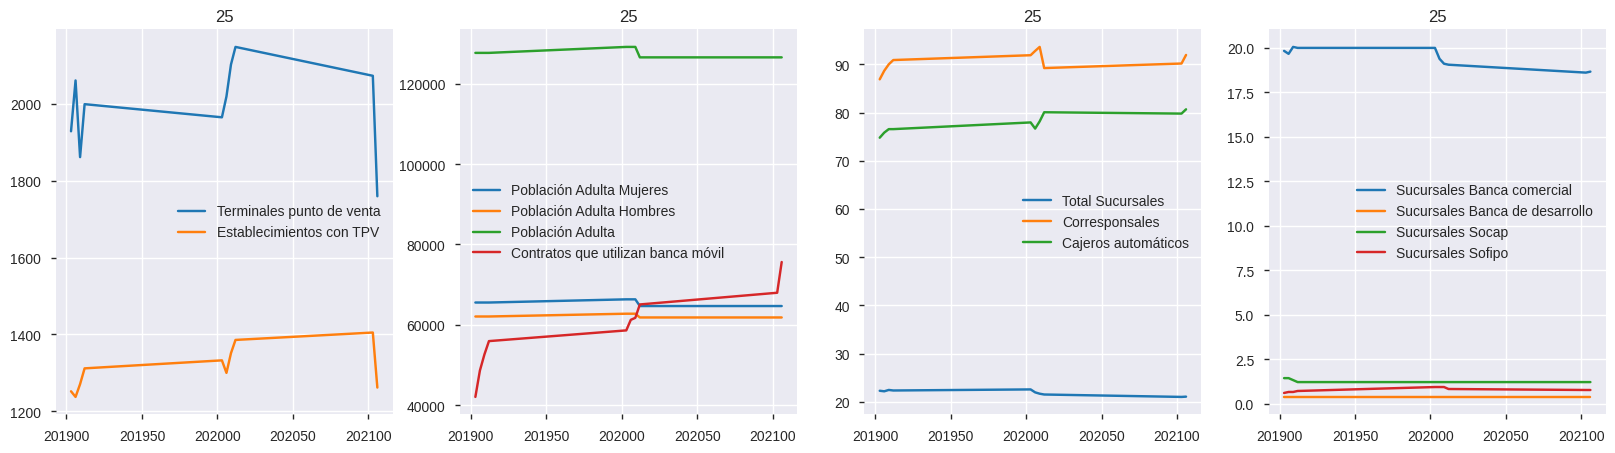

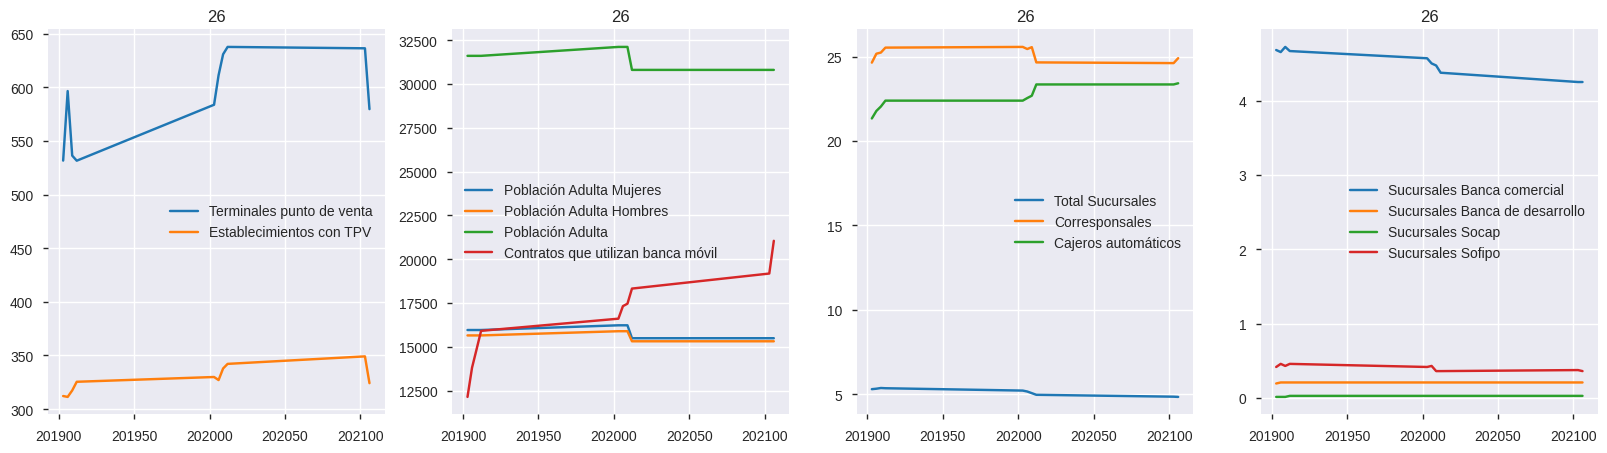

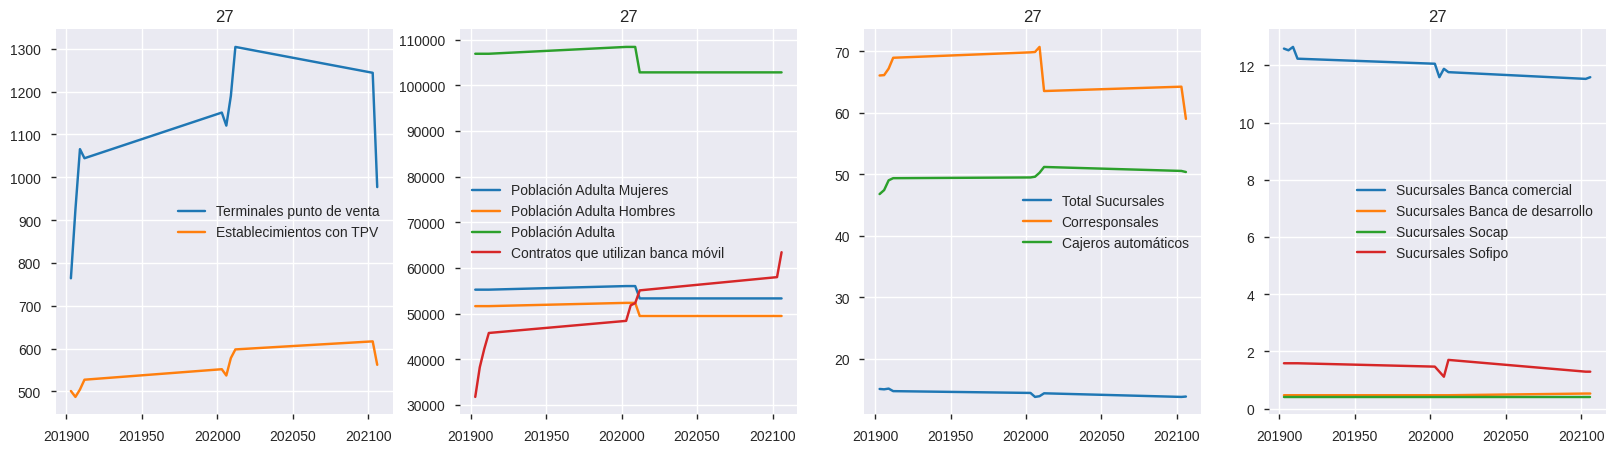

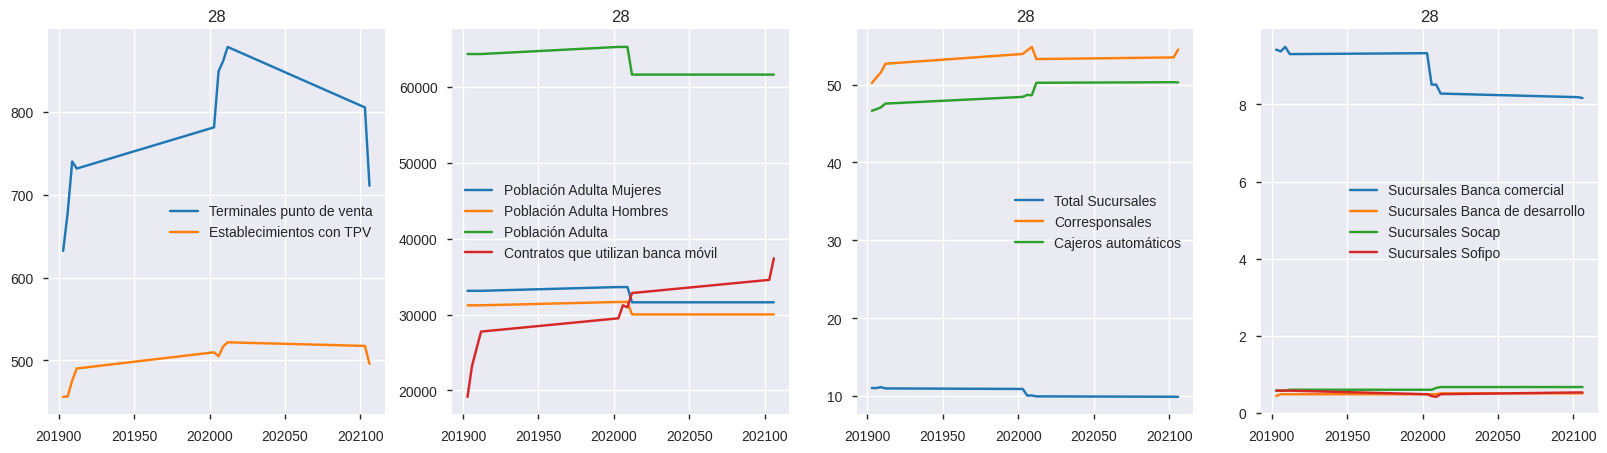

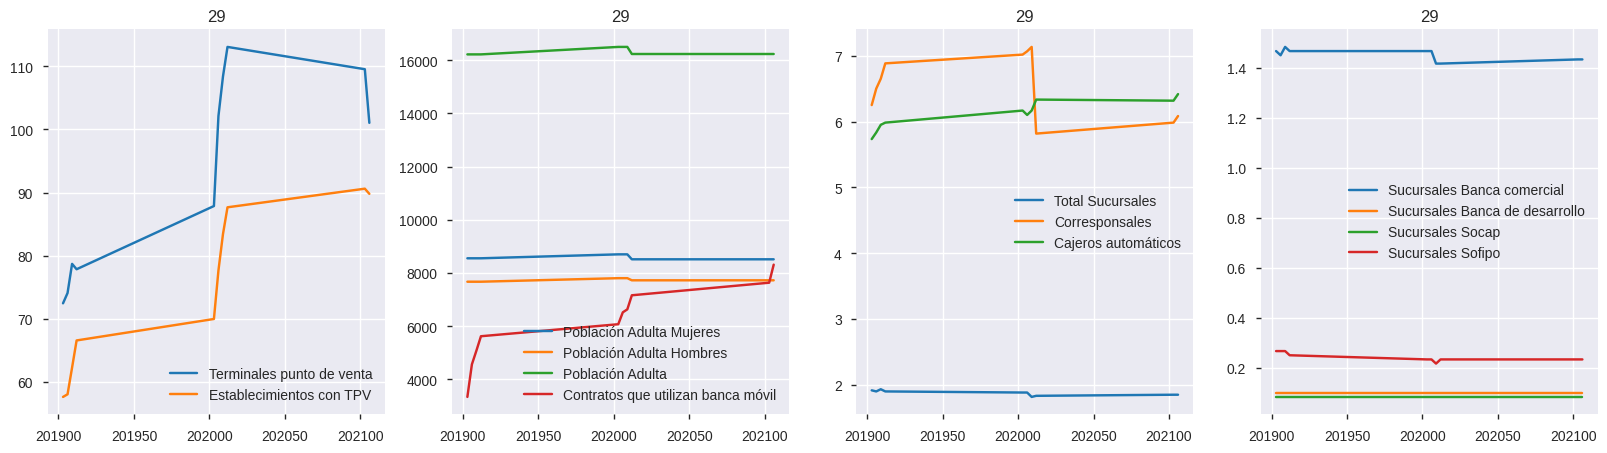

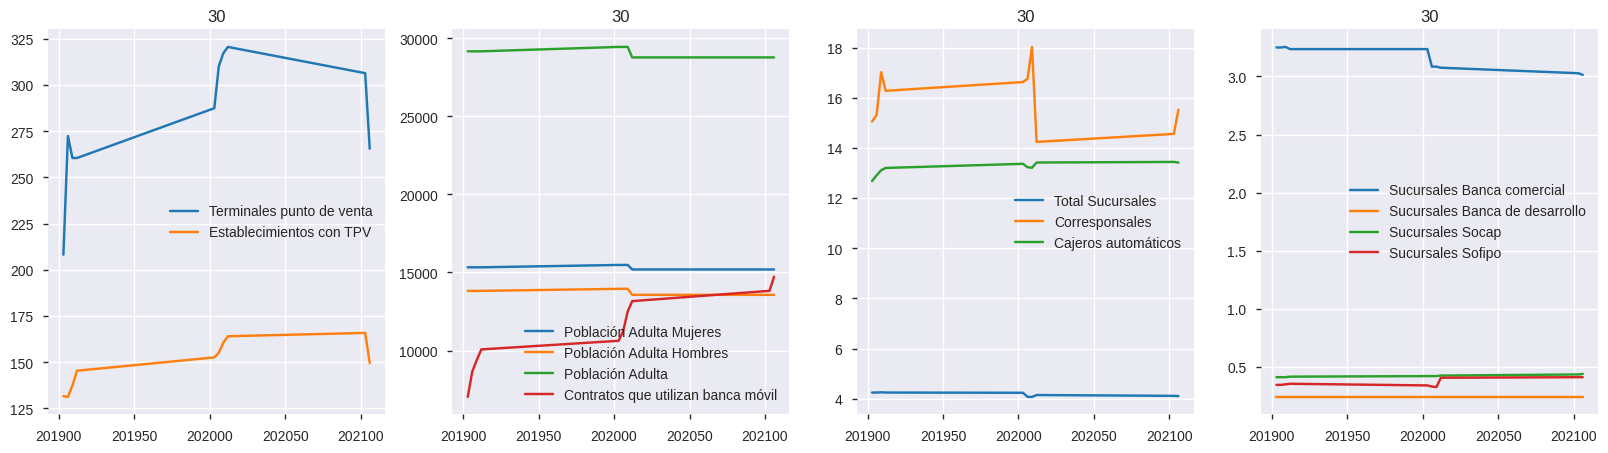

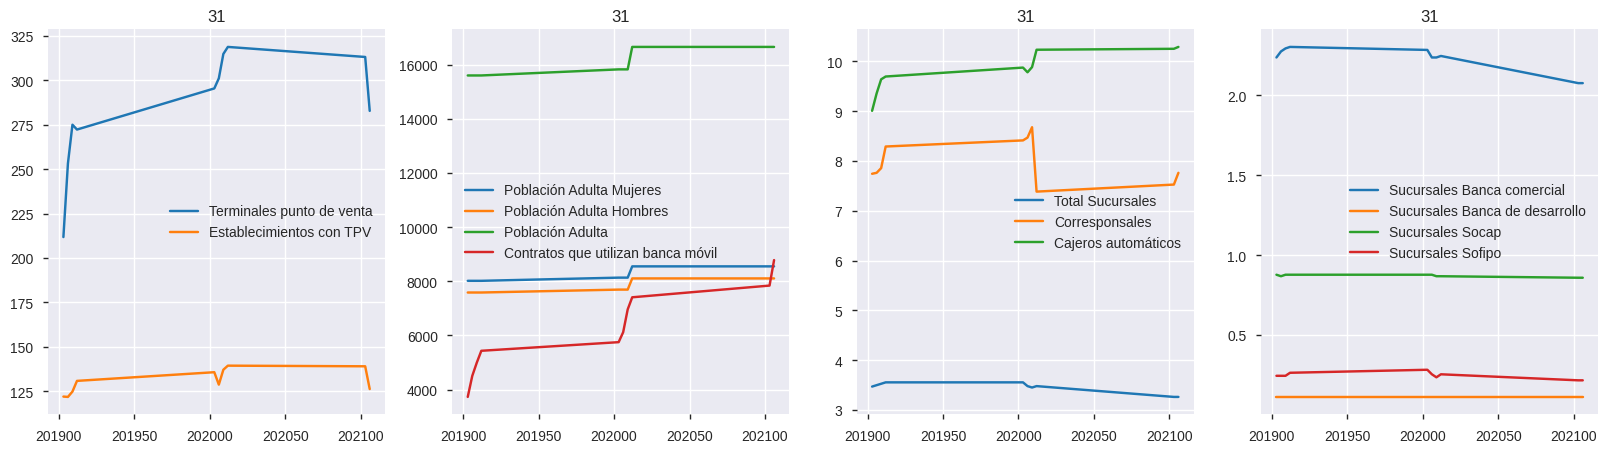

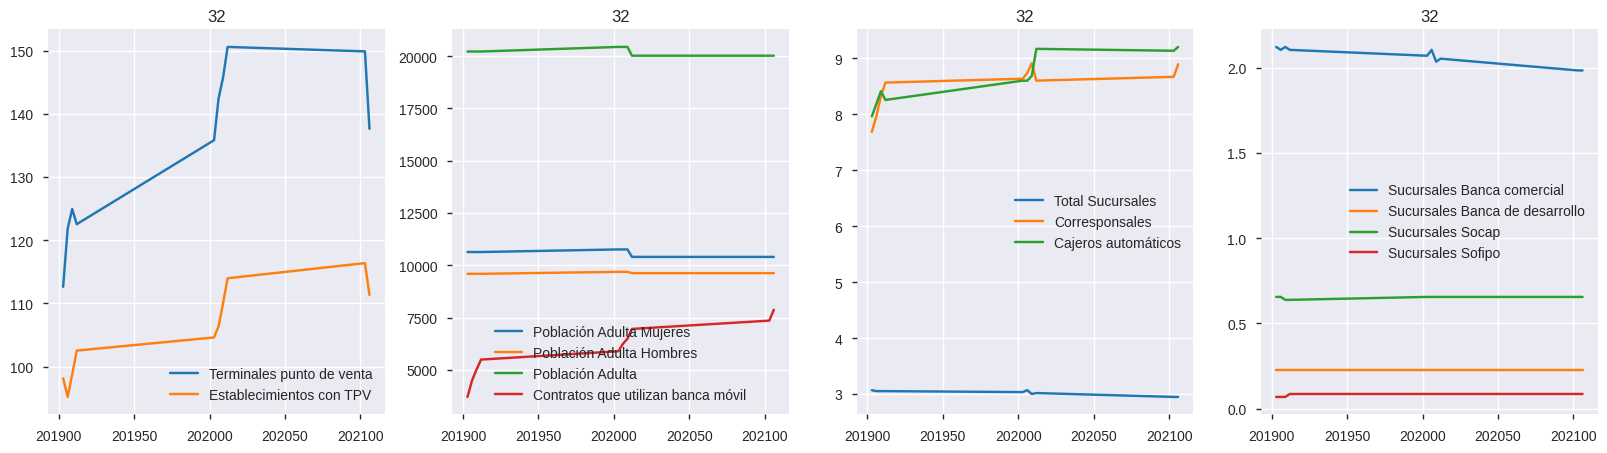

In [ ]:
cols = list(edo_trim.columns)[2:]
for edo in edo_trim['Clave \nEstado'].unique():
  data = edo_trim[edo_trim['Clave \nEstado']== edo]
  plt.figure(figsize = (20,5))
  plt.subplot(1,4,1)
  plt.plot(data['trimestre'],data['Terminales punto de venta'], label = 'Terminales punto de venta')
  plt.plot(data['trimestre'],data['Establecimientos con TPV'], label = 'Establecimientos con TPV')
  plt.legend()
  plt.title(f'{edo}')
  plt.subplot(1,4,2)
  plt.plot(data['trimestre'],data['Población Adulta Mujeres'], label = 'Población Adulta Mujeres')
  plt.plot(data['trimestre'],data['Población Adulta Hombres'], label = 'Población Adulta Hombres')
  plt.plot(data['trimestre'],data['Población Adulta'], label = 'Población Adulta')
  plt.plot(data['trimestre'],data['Contratos que utilizan banca móvil'], label = 'Contratos que utilizan banca móvil')
  plt.title(f'{edo}')
  plt.legend()
  plt.subplot(1,4,3)
  plt.plot(data['trimestre'],data['Total\nSucursales'], label = 'Total Sucursales')
  plt.plot(data['trimestre'],data['Corresponsales'], label = 'Corresponsales')
  plt.plot(data['trimestre'],data['Cajeros automáticos'], label = 'Cajeros automáticos')
  plt.title(f'{edo}')
  plt.legend()
  plt.subplot(1,4,4)
  plt.plot(data['trimestre'],data['Sucursales Banca comercial'], label = 'Sucursales Banca comercial')
  plt.plot(data['trimestre'],data['Sucursales Banca de desarrollo'], label = 'Sucursales Banca de desarrollo')
  plt.plot(data['trimestre'],data['Sucursales Socap'], label = 'Sucursales Socap')
  plt.plot(data['trimestre'],data['Sucursales Sofipo'], label = 'Sucursales Sofipo')
  plt.title(f'{edo}')
  plt.legend()
  plt.show()

In [ ]:
reg_trim = inf.groupby(['Región', 'trimestre']).agg({'Población Adulta':np.mean,
                                                  'Población Adulta Mujeres': np.mean,
                                                  'Población Adulta Hombres':np.mean,
                                                  'Sucursales Banca comercial': np.mean, 
                                                  'Sucursales Banca de desarrollo': np.mean,
                                                  'Sucursales Socap': np.mean, 
                                                  'Sucursales Sofipo': np.mean, 
                                                  'Total\nSucursales': np.mean,
                                                  'Corresponsales': np.mean, 
                                                  'Cajeros automáticos': np.mean, 
                                                  'Terminales punto de venta': np.mean,
                                                  'Establecimientos con TPV': np.mean, 
                                                  'Contratos que utilizan banca móvil': np.mean
                                           }).reset_index()
reg_trim

Región  ...  Contratos que utilizan banca móvil
0   Centro Sur y Oriente  ...                         7980.161423
1   Centro Sur y Oriente  ...                        11479.606019
2   Centro Sur y Oriente  ...                        12609.722298
3   Centro Sur y Oriente  ...                        13831.701778
4   Centro Sur y Oriente  ...                        14671.967258
5   Centro Sur y Oriente  ...                        15661.169168
6   Centro Sur y Oriente  ...                        16622.207367
7   Centro Sur y Oriente  ...                        17570.450205
8   Centro Sur y Oriente  ...                        18507.258856
9   Centro Sur y Oriente  ...                        20023.378747
10      Ciudad de México  ...                       363898.000000
11      Ciudad de México  ...                       465582.937500
12      Ciudad de México  ...                       531027.000000
13      Ciudad de México  ...                       575217.875000
14      Ciudad de México  ...                       615905.500000
15      Ciudad de México  ...                       643727.750000
16      Ciudad de México  ...                       590776.375000
17      Ciudad de México  ...                       640471.812500
18      Ciudad de México  ...                       689119.625000
19      Ciudad de México  ...                       748493.375000
20               Noreste  ...                        16724.715789
21               Noreste  ...                        19884.863158
22               Noreste  ...                        21721.331579
23               Noreste  ...                        23565.778947
24               Noreste  ...                        25033.321053
25               Noreste  ...                        26644.231579
26               Noreste  ...                        27982.947368
27               Noreste  ...                        29597.442105
28               Noreste  ...                        31132.184211
29               Noreste  ...                        33953.126316
30              Noroeste  ...                        19827.592233
31              Noroeste  ...                        23011.737864
32              Noroeste  ...                        24935.771845
33              Noroeste  ...                        26726.839806
34              Noroeste  ...                        28088.766990
35              Noroeste  ...                        29456.024272
36              Noroeste  ...                        29327.354369
37              Noroeste  ...                        30766.888350
38              Noroeste  ...                        32106.309179
39              Noroeste  ...                        35369.454106
40     Occidente y Bajío  ...                        11519.468828
41     Occidente y Bajío  ...                        14310.411471
42     Occidente y Bajío  ...                        15705.082294
43     Occidente y Bajío  ...                        17077.882793
44     Occidente y Bajío  ...                        18107.695761
45     Occidente y Bajío  ...                        19151.645885
46     Occidente y Bajío  ...                        19631.855362
47     Occidente y Bajío  ...                        20885.578554
48     Occidente y Bajío  ...                        21961.815461
49     Occidente y Bajío  ...                        23840.760599
50                   Sur  ...                         3576.963003
51                   Sur  ...                         4550.734494
52                   Sur  ...                         5049.026115
53                   Sur  ...                         5523.514690
54                   Sur  ...                         5889.501632
55                   Sur  ...                         6272.324266
56                   Sur  ...                         6431.949946
57                   Sur  ...                         6893.242655
58                   Sur  ...                         7253.019544
59                   Sur  ...                         7867

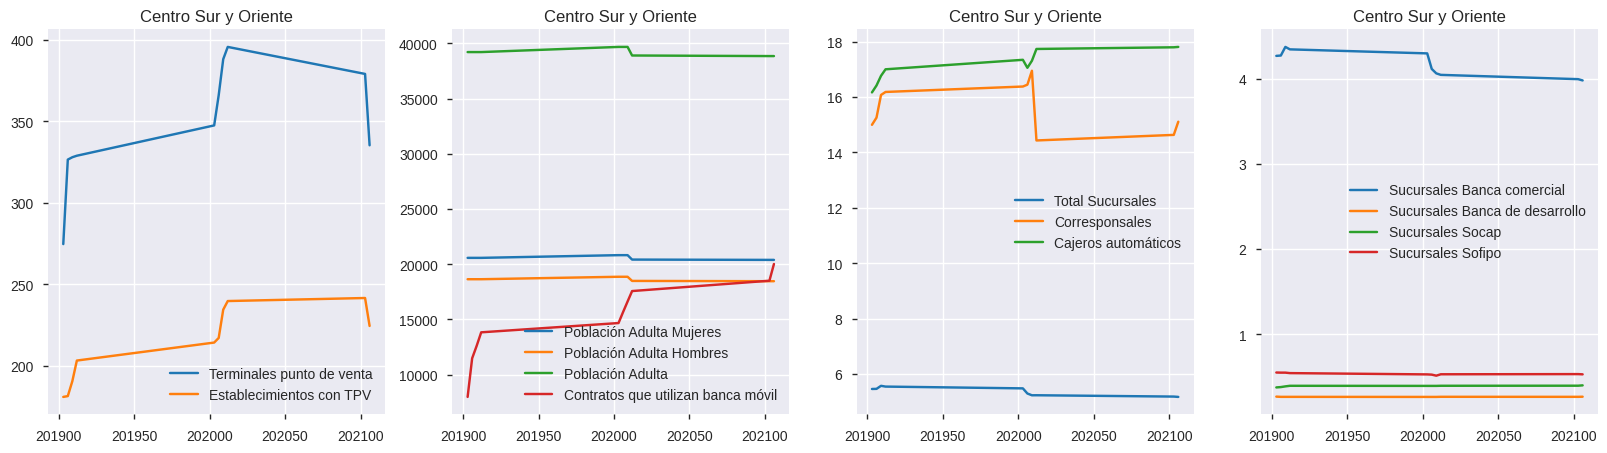

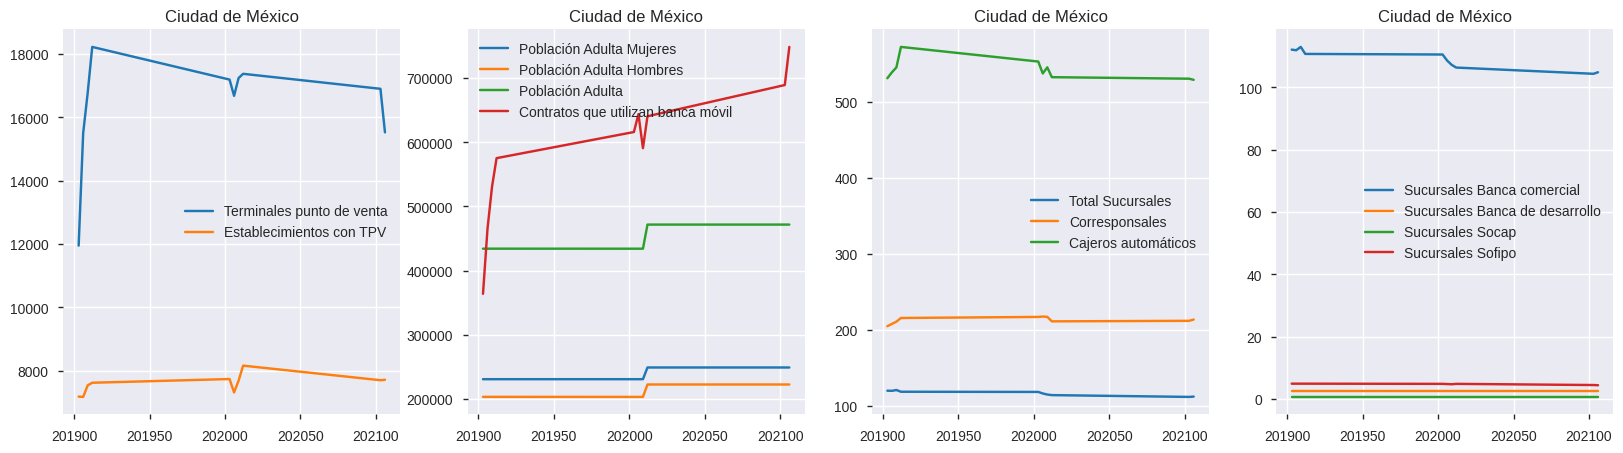

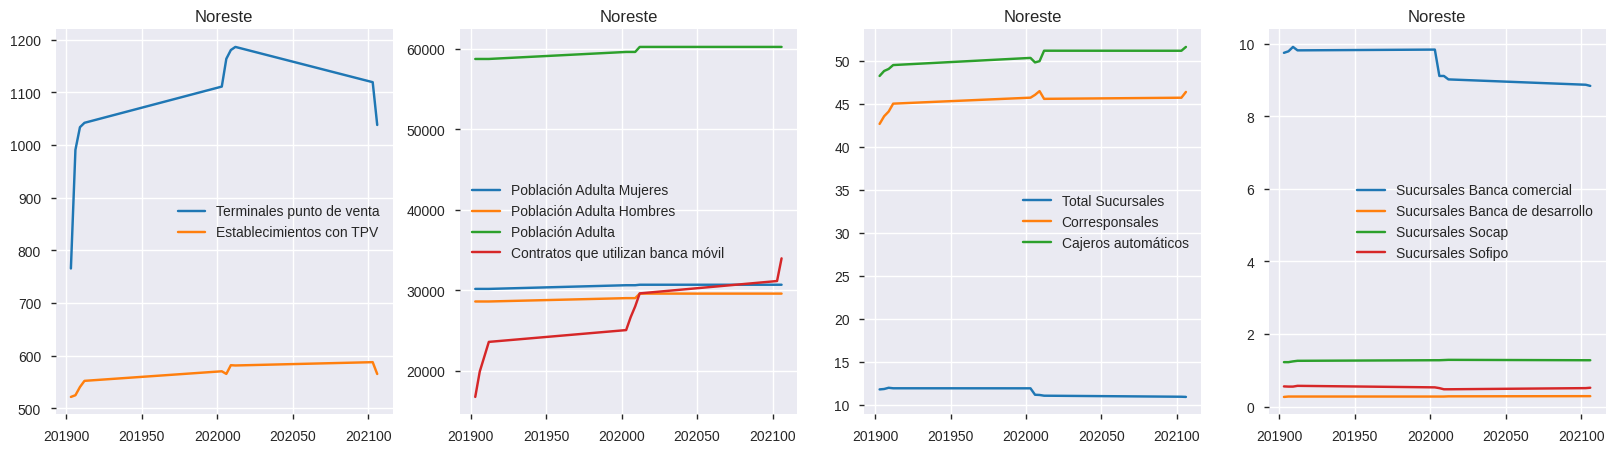

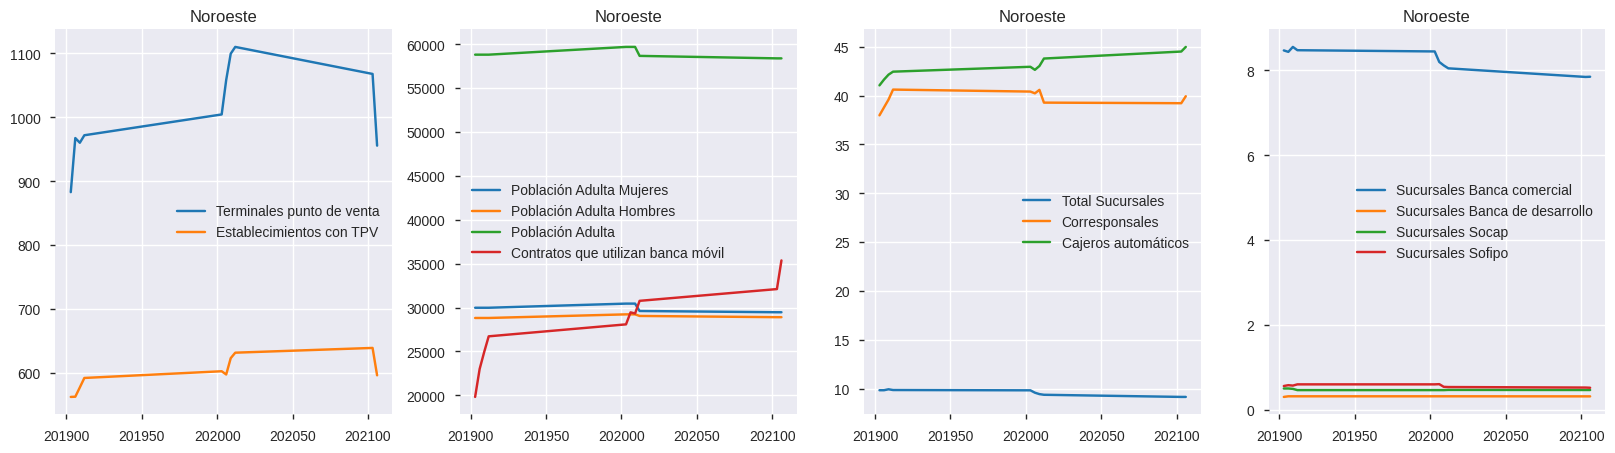

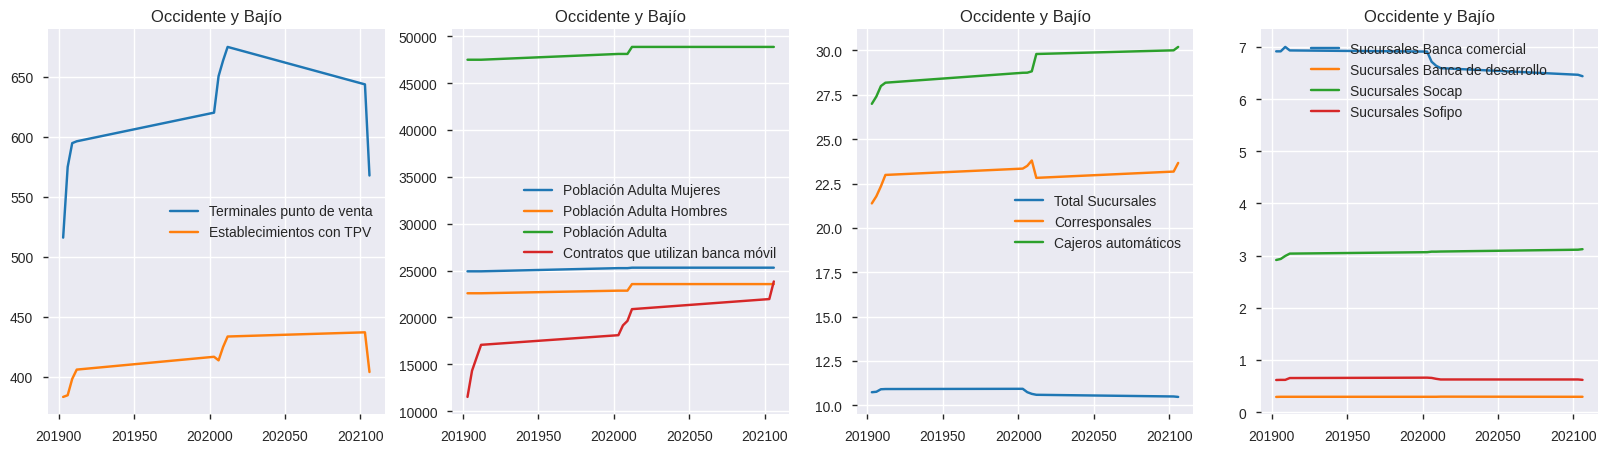

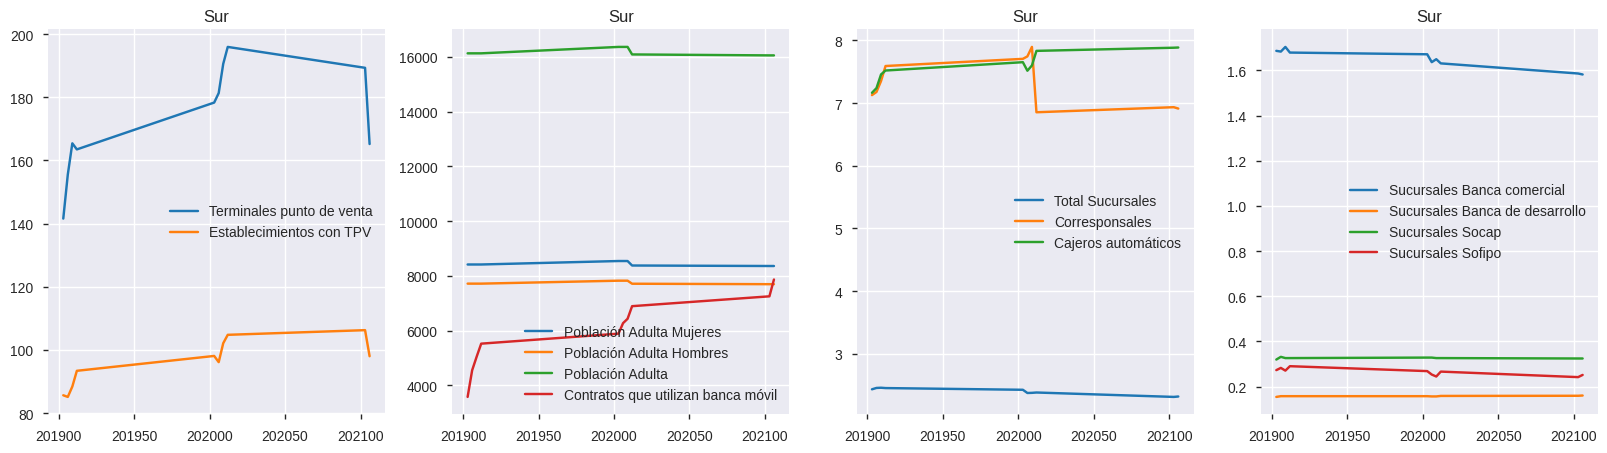

In [ ]:
cols = list(reg_trim.columns)[2:]
for reg in reg_trim['Región'].unique():
  data = reg_trim[reg_trim['Región']== reg]
  plt.figure(figsize = (20,5))
  plt.subplot(1,4,1)
  plt.plot(data['trimestre'],data['Terminales punto de venta'], label = 'Terminales punto de venta')
  plt.plot(data['trimestre'],data['Establecimientos con TPV'], label = 'Establecimientos con TPV')
  plt.legend()
  plt.title(f'{reg}')
  plt.subplot(1,4,2)
  plt.plot(data['trimestre'],data['Población Adulta Mujeres'], label = 'Población Adulta Mujeres')
  plt.plot(data['trimestre'],data['Población Adulta Hombres'], label = 'Población Adulta Hombres')
  plt.plot(data['trimestre'],data['Población Adulta'], label = 'Población Adulta')
  plt.plot(data['trimestre'],data['Contratos que utilizan banca móvil'], label = 'Contratos que utilizan banca móvil')
  plt.title(f'{reg}')
  plt.legend()
  plt.subplot(1,4,3)
  plt.plot(data['trimestre'],data['Total\nSucursales'], label = 'Total Sucursales')
  plt.plot(data['trimestre'],data['Corresponsales'], label = 'Corresponsales')
  plt.plot(data['trimestre'],data['Cajeros automáticos'], label = 'Cajeros automáticos')
  plt.title(f'{reg}')
  plt.legend()
  plt.subplot(1,4,4)
  plt.plot(data['trimestre'],data['Sucursales Banca comercial'], label = 'Sucursales Banca comercial')
  plt.plot(data['trimestre'],data['Sucursales Banca de desarrollo'], label = 'Sucursales Banca de desarrollo')
  plt.plot(data['trimestre'],data['Sucursales Socap'], label = 'Sucursales Socap')
  plt.plot(data['trimestre'],data['Sucursales Sofipo'], label = 'Sucursales Sofipo')
  plt.title(f'{reg}')
  plt.legend()
  plt.show()